# King County Housing  with Linear Regression

### By: Eric Romano, Christian Moya

## Notebook 1: # Understanding the Data & Compiling Dataset

In [189]:
# for webscraping
import os 
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time 
import sys
import numpy as np
import pandas as pd 
import regex as re 
import requests
import lxml
from lxml.html.soupparser import fromstring
import prettify
import numbers 
import htmltext

# for visuals using geopandas
from shapely.geometry import Point, Polygon 
import geopandas as gpd
import descartes

# for plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from scipy.stats import gaussian_kde
from matplotlib.font_manager import FontProperties
from matplotlib.path import Path
from matplotlib.textpath import TextToPath
import tilemapbase
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
import adjustText as aT
import shapely.speedups
shapely.speedups.enable()

# for stats (min,max,mean)
import haversine as hs
import folium
import statistics
from numpy import mean
from numpy import std 

In [3]:
data= pd.read_csv('kc_house_data.csv')
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

### Handling Null values or special characters

In [6]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [7]:
data.loc[data['sqft_basement'] == "?"]['sqft_basement']

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object

In [8]:
## Cannot convert the data type to a float because some of the rows contain a '?'
#data['sqft_basement'] = data['sqft_basement'].astype(float)

There are 454 rows that have an unknown value for the sqft_basement
Will be filling the missing values with the features's median. The reason for keeping these values is because

In [9]:
median = data.loc[data['sqft_basement'] != '?']['sqft_basement'].median()
print(median)

0.0


In [10]:
data['sqft_basement'] = data['sqft_basement'].replace('?', median)
data['sqft_basement'] = data['sqft_basement'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


### Detecting and Dealing with Null Values

In [11]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
print('Number missing both yr_renovated & waterfront:', len(data[(data.yr_renovated.isnull())
                                                               & (data.waterfront.isnull())]))

Number missing both yr_renovated & waterfront: 430


In [13]:
data.dropna(subset=['waterfront'], inplace=True)
print(data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


### The clean version of the DF

We have arrived at a point where we were able to clean the overall dataframe. Some of the things that were done to ensure the df was clean are as follow:

1. There are 454 rows that have an '?' value for the sqft_basement column
2. Replaced the NAN in the waterfront column to 0

Now we will only select the columns we believe are important in addressing our buisness problem. In this case, we will like to focus our attention on features that will assist first home buyers that are seeking a house to live in and provides them the foundation to develop wealth. These first home buys more specifically have started a family or plan to start one.

In [68]:
# these will be the columns that you will focus your project 
column= ['price', 'bedrooms', 'bathrooms','sqft_lot', 'sqft_living','floors', 'waterfront','condition',
         'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long']

data_pred = data[column]
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 14 columns):
price            19221 non-null float64
bedrooms         19221 non-null int64
bathrooms        19221 non-null float64
sqft_lot         19221 non-null int64
sqft_living      19221 non-null int64
floors           19221 non-null float64
waterfront       19221 non-null float64
condition        19221 non-null int64
grade            19221 non-null int64
sqft_above       19221 non-null int64
sqft_basement    19221 non-null float64
zipcode          19221 non-null int64
lat              19221 non-null float64
long             19221 non-null float64
dtypes: float64(7), int64(7)
memory usage: 2.2 MB


In [69]:
data_pred.reset_index(inplace=True)

In [187]:
def outlier(df, i):
    ### This function was developed to locate outliers as well as finding the bounds
    ### of the model
    
    price_mean, price_std = mean(df.price), std(df.price)
    
    cutoff = price_std*i
    
    lower_price, upper_price = price_mean - cutoff, price_mean + cutoff
    
    outliers = [x for x in df.price if x < lower_price or x > upper_price]
    
    return sorted(outliers), lower_price, upper_price

In [190]:
outlier(data_pred,1.5)

([1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1100000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1110000.0,
  1120000.0,
  1120000.0,
  1120000.0,
  1120000.0,
  1120000.0,
  1120000.0,
  1120000.0,
  1120000.0,
  1120000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,
  1130000.0,

In [191]:
data_pred = data_pred[data_pred.price < 1099996]

In [200]:
data_pred.reset_index(inplace=True)

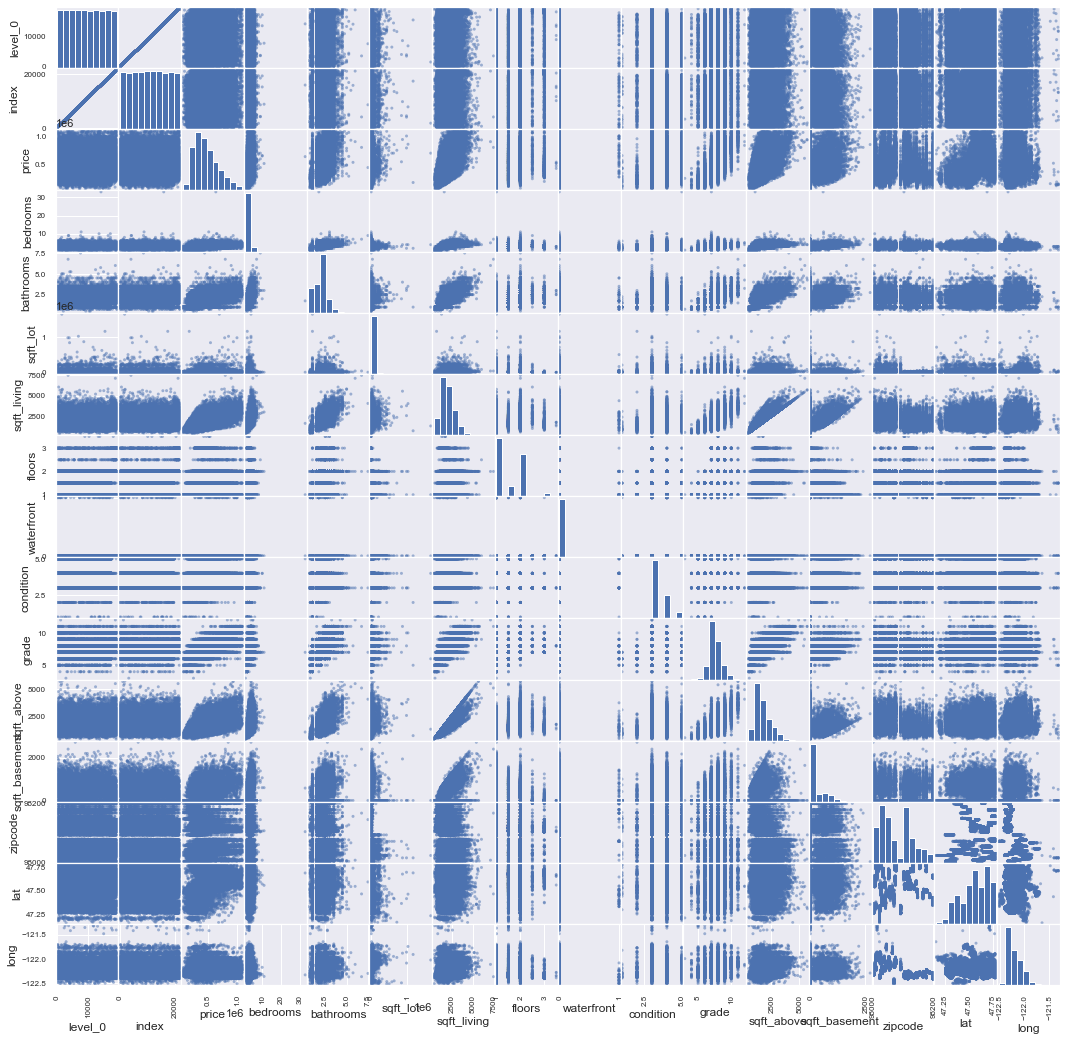

In [341]:
pd.plotting.scatter_matrix(data_pred, figsize = [18,18]);
plt.show()

From examining this scatter mattrix it seems that sqft_living, sqft_above, grade, bathroom, and condition might have a linear relationship with price.

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

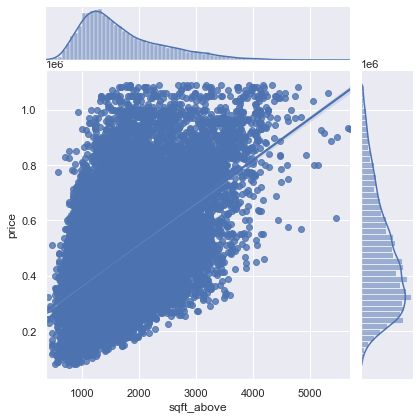

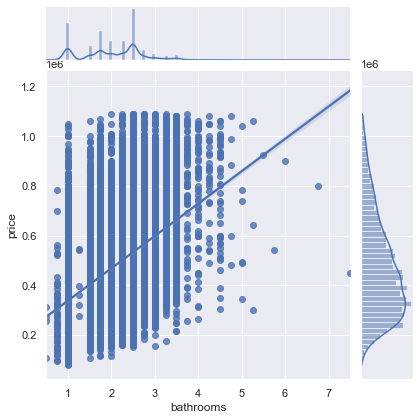

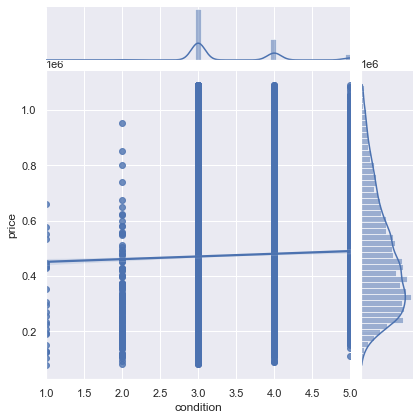

In [351]:
sns.jointplot('sqft_living','price', data=data_pred, kind='reg')
sns.jointplot('sqft_above', 'price', data=data_pred, kind='reg')
sns.jointplot('bathrooms', 'price', data=data_pred, kind='reg')
sns.jointplot('floors', 'price', data=data_pred, kind='reg')
sns.jointplot('bedrooms', 'price', data=data_pred, kind='reg')
sns.jointplot('grade', 'price', data=data_pred, kind='reg')
sns.jointplot('condition', 'price', data=data_pred, kind='reg')

When looking into both sqft_living and sqft_above they seem to represent the same data, the only difference is sqft_living includes the sqft of a finished basement. I believe it will be best to only keep sft_living due to possibly introducing multicolinearity into the future models.



In [352]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.boxplot(x="condition", y="price", data=data_pred)

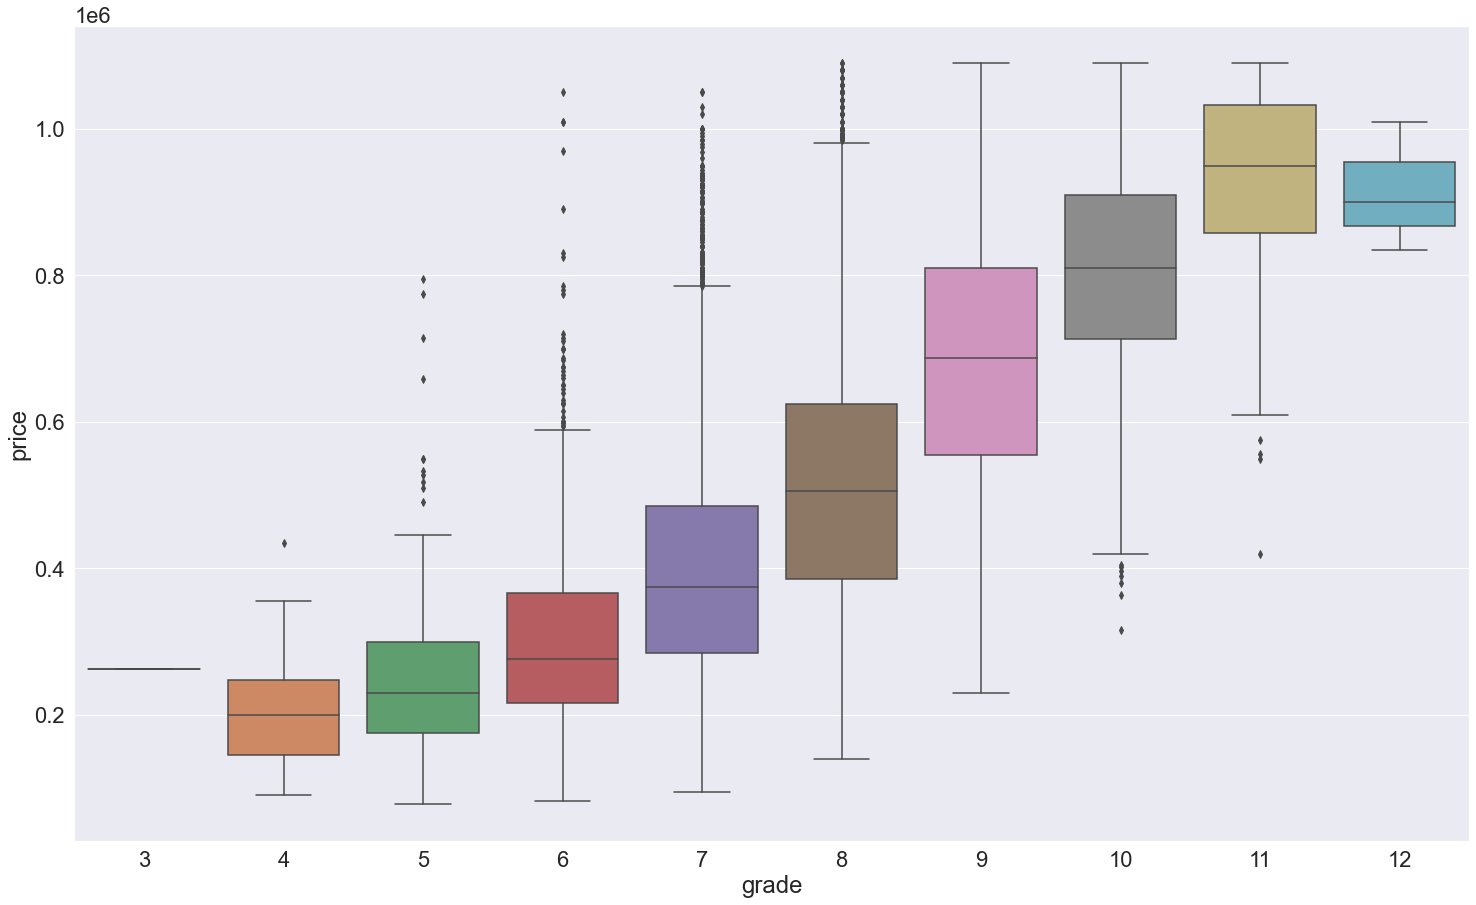

In [354]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.boxplot(x="grade", y="price", data=data_pred)

## Adding school features and understanding the data w/ respect to price 

In [192]:
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'cookie': 'xid=9a676342-be4e-474f-8055-f28e7cdfa0fe; experiments=%5E%5E%5E%24%5D; _gcl_au=1.1.864749517.1606425792; niche_npsSurvey=0; niche_fullStory=0; niche_singleFirstPageview=1; niche_singleK12Pageview=1; _ga=GA1.2.864996679.1606425792; _gid=GA1.2.774250621.1606425792; _cmpQcif3pcsupported=1; _scid=f71b3f3a-caad-4ba2-be06-1dbac13a2e5f; _pxvid=96b59a34-302d-11eb-b80f-0242ac120004; _sctr=1|1606366800000; hintSeenLately=true; niche_singleProfilePageview=1; ab.storage.deviceId.97a5be8e-e2ba-4f2c-9159-9ae910fa9648=%7B%22g%22%3A%22048f2d80-fb47-fe85-90ac-1cde8c09f5cf%22%2C%22c%22%3A1606426385326%2C%22l%22%3A1606426385326%7D; recentlyViewed=entityHistory%7CentityName%7CIssaquah%2BSchool%2BDistrict%7CentityGuid%7C2d1d7e10-133e-48fc-92f0-5c98a2df913c%7CentityType%7CSchoolDistrict%7CentityFragment%7Cissaquah-school-district-wa%7CsearchHistory%7CKing%2BCounty%7Cfa431d9e-f005-401a-87a9-ca0d1327175a%7CCounty%7Cking-county-wa%7CSeattle%2BArea%7C6023ccf7-09a4-4571-8543-3d06a201095e%7CMetroArea%7Cseattle-metro-area%5E%5E%5E%240%7C%40%241%7C2%7C3%7C4%7C5%7C6%7C7%7C8%5D%5D%7C9%7C%40%241%7CA%7C3%7CB%7C5%7CC%7C7%7CD%5D%7C%241%7CE%7C3%7CF%7C5%7CG%7C7%7CH%5D%5D%5D; niche_cookieConsent=true; navigation=%7B%22location%22%3A%7B%22guid%22%3A%22fa431d9e-f005-401a-87a9-ca0d1327175a%22%2C%22type%22%3A%22County%22%2C%22name%22%3A%22King%20County%22%2C%22url%22%3A%22king-county-wa%22%7D%2C%22navigationMode%22%3A%22full%22%2C%22vertical%22%3A%22k12%22%2C%22mostRecentVertical%22%3A%22k12%22%2C%22suffixes%22%3A%7B%22colleges%22%3A%22%2Fs%2Fwashington%2F%22%2C%22graduate-schools%22%3A%22%2Fs%2Fwashington%2F%22%2C%22k12%22%3A%22%2Fc%2Fking-county-wa%2F%22%2C%22places-to-live%22%3A%22%2Fc%2Fking-county-wa%2F%22%2C%22places-to-work%22%3A%22%2Fc%2Fking-county-wa%2F%22%7D%7D; _fbp=fb.1.1606452501546.807608277; pageViews=10; niche_sessionPageCount=18; _uetsid=967c3670302d11eb819ad30d2e06fd07; _uetvid=967c5e40302d11eb942a231f8fe229d3; ab.storage.sessionId.97a5be8e-e2ba-4f2c-9159-9ae910fa9648=%7B%22g%22%3A%22bab65e53-61d1-c6b6-37a7-edd9bd3145d6%22%2C%22e%22%3A1606497900952%2C%22c%22%3A1606495110304%2C%22l%22%3A1606496100952%7D',
    'if-none-match': 'W/"36f86-J+QA0HSljx0W6UHNFLTMZNVdnKw"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36'
    }
url = 'https://www.niche.com/k12/search/best-school-districts/c/king-county-wa/'
response = requests.get(url, headers=headers)

In [193]:
soup = BeautifulSoup(response.content, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>
<html data-reactroot="" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=0.86, maximum-scale=3.0, minimum-scale=0.86" name="viewport"/><meta content="298822776951871" property="fb:app_id"/><meta content="Niche" property="og:site_name"/><meta content="en_US" property="og:locale"/><meta content="#FFFFFF" name="msapplication-TileColor"/><meta content="https://d33a4decm84gsn.cloudfront.net/static/favicons/favicon-144.png" name="msapplication-TileImage"/><meta content="https://d33a4decm84gsn.cloudfront.net/static/favicons/browserconfig.xml" name="msapplication-config"/><meta content="#59a44d" name="theme-color"/><meta content="always" name="referrer"/><link href="/favicon.ico" rel="shortcut icon"/><link href="https://d33a4decm84gsn.cloudfront.net/static/favicons/favicon.ico" rel="icon" sizes="16x16 32x32 64x64"/><link href="https://d33a4decm84gsn.cloudfr

In [195]:
df = pd.DataFrame()


for i in soup:
    district = soup.find_all('h2', class_='search-result__title')
    grade_A_plus = soup.find_all('div', class_='niche__grade niche__grade--small--a-plus')
    grade_A = soup.find_all('div', class_='niche__grade niche__grade--small--a')
    grade_A_minus = soup.find_all('div', class_='niche__grade niche__grade--small--a-minus')
    grade_B_plus = soup.find_all('div', class_='niche__grade niche__grade--small--b-plus')
    grade_B = soup.find_all('div', class_='niche__grade niche__grade--small--b')
    grade_B_minus = soup.find_all('div', class_='niche__grade niche__grade--small--b-minus')
    grade_C_plus = soup.find_all('div', class_='niche__grade niche__grade--small--c-plus')
    grade_D_plus = soup.find_all('div', class_='niche__grade niche__grade--small--d-plus')
    
    total_sch = soup.find_all('div', class_='search-result-fact')
    
    df['district'] = district
    df['grade'] = grade_A_plus[0:4] + grade_A[0:3] + grade_A_minus + grade_B_plus + grade_B + grade_B_minus + grade_C_plus + grade_D_plus + grade_D_plus 
    df['total_sch'] = total_sch[::2][0:20]
    df['total_student'] = total_sch[1::2][0:20]

ValueError: Length of values does not match length of index

In [197]:
df

district grade  \
0            [Mercer Island School District, []]  [A+]   
1                     [Bellevue School District]  [A+]   
2              [Lake Washington School District]  [A+]   
3                     [Issaquah School District]  [A+]   
4                   [Tahoma School District, []]   [A]   
5                [Shoreline School District, []]   [A]   
6            [Vashon Island School District, []]   [A]   
7            [Snoqualmie Valley School District]  [A-]   
8                       [Seattle Public Schools]  [A-]   
9                    [Riverview School District]  [B+]   
10                  [Auburn School District, []]   [B]   
11                    [Enumclaw School District]   [B]   
12                   [Skykomish School District]   [B]   
13                        [Kent School District]   [B]   
14                      [Renton School District]  [B-]   
15                  [Federal Way Public Schools]  [C+]   
16                    [Highline School District]  [C+]   
17                     [Tukwila School District]  [C+]   
18                   [Muckleshoot Tribal School]  [D+]   
19  [North Brunswick Township Middle School, []]  [D+]   

                      total_sch  
0     [[6],  , [Total Schools]]  
1    [[31],  , [Total Schools]]  
2    [[55],  , [Total Schools]]  
3    [[27],  , [Total Schools]]  
4     [[9],  , [Total Schools]]  
5    [[19],  , [Total Schools]]  
6     [[5],  , [Total Schools]]  
7    [[13],  , [Total Schools]]  
8   [[108],  , [Total Schools]]  
9     [[9],  , [Total Schools]]  
10   [[24],  , [Total Schools]]  
11   [[10],  , [Total Schools]]  
12    [[2],  , [Total Schools]]  
13   [[44],  , [Total Schools]]  
14   [[29],  , [Total Schools]]  
15   [[46],  , [Total Schools]]  
16   [[40],  , [Total Schools]]  
17    [[8],  , [Total Schools]]  
18    [[1],  , [Total Schools]]  
19       [[904],  , [Students]]

In [198]:
# Convert columns to str 
df['district'] = df['district'].astype('str')
df['grade'] = df['grade'].astype('str')
df['total_sch'] = df['total_sch'].astype('str')
df['total_student'] = df['total_student'].astype('str')

KeyError: 'total_student'

In [21]:
df['district'] = df['district'].replace('<h2 class="search-result__title">', '', regex=True)
df['district'] = df['district'].replace('</h2>', '', regex=True)
df['district'] = df['district'].replace('<div class="search-result__claimed-indicator">', '', regex=True)
df['district'] = df['district'].replace('</div>', '', regex=True)
df['district'] = df['district'].replace(' School District', '', regex=True).replace(' Public Schools', '', regex=True).replace(' School', '', regex=True)

In [22]:
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--a-plus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--a">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--a-minus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--b-plus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--b">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--b-minus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--c-plus">', '', regex=True)
df['grade'] = df['grade'].replace('<div class="niche__grade niche__grade--small--d-plus">', '', regex=True)
df['grade'] = df['grade'].replace('</div>', '', regex=True)

In [23]:
df['total_sch'] = df['total_sch'].replace('<div class="search-result-fact"><span class="search-result-fact__value">', '', regex=True)
df['total_sch'] = df['total_sch'].replace('</span>\xa0<span class="search-result-fact__label">Total Schools</span></div>', '', regex=True)

In [24]:
df['total_student'] = df['total_student'].replace('<div class="search-result-fact"><span class="search-result-fact__value">', '', regex=True)
df['total_student'] = df['total_student'].replace('</span>\xa0<span class="search-result-fact__label">Students</span></div>', '', regex=True)


In [25]:
df = df.iloc[0:19]

In [26]:
df['district'] = df['district'].str.lower()

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df

district grade total_sch total_student
0        mercer island    A+         6         4,522
1             bellevue    A+        31        21,609
2      lake washington    A+        55        30,675
3             issaquah    A+        27        20,897
4               tahoma     A         9         8,906
5            shoreline     A        19         9,899
6        vashon island     A         5         1,585
7    snoqualmie valley    A-        13         7,214
8              seattle    A-       108        55,271
9            riverview    B+         9         3,482
10              auburn     B        24        17,505
11            enumclaw     B        10         4,183
12           skykomish     B         2            57
13                kent     B        44        27,291
14              renton    B-        29        16,425
15         federal way    C+        46        23,489
16            highline    C+        40        19,213
17             tukwila    C+         8         3,046
18  muckleshoot tribal    D+         1           492

In [28]:
df.to_csv('King_County_Sch_District_Grades.csv')

In [29]:
#Bringing in a .csv that contains all schools from KingCounty.gov
data_kc_schsite= pd.read_csv('School_Sites_in_King_County___schsite_point.csv')
data_kc_schsite.head()

X          Y  OBJECTID  FEATURE_ID   ESITE  CODE  \
0 -122.152303  47.608461         1         207      80   662   
1 -122.205415  47.768906         2         263     113   660   
2 -122.348454  47.525265         3         884  527409   660   
3 -122.200170  47.667245         4         475    8634   660   
4 -122.294727  47.708042         5        1093   12282   662   

                              NAME       ABB_NAME             ADDRESS  \
0            Sammamish High School      Sammamish    100 140th Ave SE   
1    Saint Brendan Catholic School  Saint Brendan   10049 NE 195th St   
2  Highland Park Elementary School  Highland Park  1012 SW Trenton St   
3       Lakeview Elementary School       Lakeview    10400 NE 68th St   
4          Nathan Hale High School    Nathan Hale   10750 30th Ave NE   

   ZIPCODE    LONG_CEN    LAT_CEN  SCH_CLASS         DISTRICT           PIN  \
0    98005 -122.152304  47.608458       10.0         BELLEVUE  3.425059e+09   
1    98011 -122.205416  47.768905       20.0       NORTHSHORE  5.260591e+08   
2    98106 -122.348456  47.525263       10.0          SEATTLE  7.972603e+09   
3    98033 -122.200171  47.667242       10.0  LAKE WASHINGTON  7.882600e+09   
4    98125 -122.294728  47.708040       10.0          SEATTLE  2.826049e+09   

      MAJOR   MINOR         FEATUREDES  OSPI_CODE  
0  342505.0  9019.0        School-High     3282.0  
1   52605.0  9084.0  School-Elementary        0.0  
2  797260.0  3210.0  School-Elementary     2269.0  
3  788260.0   132.0  School-Elementary     3041.0  
4  282604.0  9152.0        School-High     3479.0

In [30]:
# In order to connect the districts together I will first lower case all columns and all element in 
# the column district
data_kc_schsite.columns= data_kc_schsite.columns.str.lower()
data_kc_schsite['district']= data_kc_schsite['district'].str.lower()

In [31]:
# I will be dropping any schools that has an unknown district
data_kc_schsite.dropna(subset=['district'], inplace=True)
# Count the number of null values you have
data_kc_schsite.isnull().sum()

x              0
y              0
objectid       0
feature_id     0
esite          0
code           0
name           0
abb_name       0
address        0
zipcode        0
long_cen       0
lat_cen        0
sch_class      0
district       0
pin            0
major          0
minor          0
featuredes     0
ospi_code     35
dtype: int64

In [32]:
# Selecting the only features that wil be needed for the purpose of this project
data_schsite = data_kc_schsite.loc[:, ['long_cen', 'lat_cen', 'zipcode', 'district', 'featuredes','name']]
data_schsite_list = data_schsite['district'].unique().tolist()

In [34]:
data_schsite

long_cen    lat_cen  zipcode         district  \
0   -122.152304  47.608458    98005         bellevue   
1   -122.205416  47.768905    98011       northshore   
2   -122.348456  47.525263    98106          seattle   
3   -122.200171  47.667242    98033  lake washington   
4   -122.294728  47.708040    98125          seattle   
..          ...        ...      ...              ...   
636 -122.228328  47.537685    98040    mercer island   
637 -122.218848  47.759858    98011       northshore   
638 -122.318018  47.694271    98115          seattle   
640 -122.138098  47.264255    98092           auburn   
641 -122.116470  47.244476    98092           auburn   

                       featuredes                             name  
0                     School-High            Sammamish High School  
1               School-Elementary    Saint Brendan Catholic School  
2               School-Elementary  Highland Park Elementary School  
3               School-Elementary       Lakeview Elementary School  
4                     School-High          Nathan Hale High School  
..                            ...                              ...  
636     School-Junior High/Middle           Islander Middle School  
637                   School-High              Bothell High School  
638             School-Elementary               The Perkins School  
640                   School-K-12        Muckleshoot Tribal School  
641  School-College or University       Muckleshoot Tribal College  

[641 rows x 6 columns]

In [36]:
# Wanted to find only schools for children and young adults. Will only use School-K-12, School-Junior High/Middle, School-Elementry,
# and School-High
data_schsite.featuredes.unique()

array(['School-High', 'School-Elementary', 'School-Alternative',
       'School-Junior High/Middle', 'School-College or University',
       'School-K-12', 'School-Other Facility'], dtype=object)

In [53]:
data_schsite_K_12 = data_schsite.loc[(data_schsite.featuredes == 'School-K-12') | (data_schsite.featuredes == 'School-Junior High/Middle') |
                                     (data_schsite.featuredes == 'School-Elementary') | (data_schsite.featuredes == 'School-High')]

In [62]:
list_school = data_schsite_K_12.featuredes.unique().tolist()

In [63]:
list_district = data_schsite_K_12.district.unique().tolist()

In [60]:
data_schsite_K_12.loc[(data_schsite.district == 'seattle')].loc[(data_schsite.featuredes == 'School-K-12')]

long_cen    lat_cen  zipcode district   featuredes         name
198 -122.288666  47.622911    98112  seattle  School-K-12  Bush School

In [71]:
# I would to look at the count of schools with in each district
data_schsite.groupby('district').count()['zipcode']

district
auburn                33
bellevue              48
enumclaw              10
federal way           44
highline              44
issaquah              30
kent                  44
lake washington       64
mercer island         12
northshore            31
renton                30
riverview              8
seattle              183
shoreline             25
skykomish              1
snoqualmie valley     12
tahoma                11
tukwila                6
vashon island          5
Name: zipcode, dtype: int64

In [72]:
# Now I will connect each district to a list of all zipcodes that belong to the district
district_zip = {}

for i in range(len(data_schsite_list)):
    x = data_schsite_list[i]
    district_zip[x] = data_schsite.loc[data_schsite['district'] == x].sort_values(['zipcode']).zipcode.unique().tolist()

district_zip

{'bellevue': [98004, 98005, 98006, 98007, 98008, 98039, 98121],
 'northshore': [98011, 98028, 98052, 98072, 98077],
 'seattle': [98101,
  98102,
  98103,
  98104,
  98105,
  98106,
  98107,
  98108,
  98109,
  98112,
  98115,
  98116,
  98117,
  98118,
  98119,
  98121,
  98122,
  98125,
  98126,
  98133,
  98134,
  98136,
  98144,
  98146,
  98177,
  98178,
  98195,
  98199],
 'lake washington': [98028, 98033, 98034, 98052, 98053, 98074, 98077],
 'highline': [98146, 98148, 98166, 98168, 98188, 98198],
 'renton': [98055, 98056, 98057, 98058, 98059, 98178],
 'snoqualmie valley': [98024, 98045, 98065],
 'auburn': [98001, 98002, 98047, 98092],
 'kent': [98010, 98030, 98031, 98032, 98042, 98058, 98198],
 'federal way': [98001, 98003, 98023, 98032, 98198],
 'enumclaw': [98010, 98022],
 'issaquah': [98006, 98008, 98027, 98029, 98059, 98065, 98075],
 'shoreline': [98133, 98155, 98177],
 'tahoma': [98038, 98042, 98051],
 'vashon island': [98070],
 'riverview': [98014, 98019],
 'mercer island':

In [73]:
# Put it into a dataframe
df_district_zip = pd.DataFrame(list(district_zip.items()),columns = ['district','zipcode']) 
df_district_zip

district                                            zipcode
0            bellevue  [98004, 98005, 98006, 98007, 98008, 98039, 98121]
1          northshore                [98011, 98028, 98052, 98072, 98077]
2             seattle  [98101, 98102, 98103, 98104, 98105, 98106, 981...
3     lake washington  [98028, 98033, 98034, 98052, 98053, 98074, 98077]
4            highline         [98146, 98148, 98166, 98168, 98188, 98198]
5              renton         [98055, 98056, 98057, 98058, 98059, 98178]
6   snoqualmie valley                              [98024, 98045, 98065]
7              auburn                       [98001, 98002, 98047, 98092]
8                kent  [98010, 98030, 98031, 98032, 98042, 98058, 98198]
9         federal way                [98001, 98003, 98023, 98032, 98198]
10           enumclaw                                     [98010, 98022]
11           issaquah  [98006, 98008, 98027, 98029, 98059, 98065, 98075]
12          shoreline                              [98133, 98155, 98177]
13             tahoma                              [98038, 98042, 98051]
14      vashon island                                            [98070]
15          riverview                                     [98014, 98019]
16      mercer island                                            [98040]
17            tukwila                                     [98168, 98188]
18          skykomish                                            [98288]

In [74]:
kc_sch_district_grades = pd.read_csv('King_County_Sch_District_Grades.csv')
kc_sch_district_grades = kc_sch_district_grades.drop('Unnamed: 0', axis=1)
kc_sch_district_grades

district grade  total_sch total_student
0        mercer island    A+          6         4,522
1             bellevue    A+         31        21,609
2      lake washington    A+         55        30,675
3             issaquah    A+         27        20,897
4               tahoma     A          9         8,906
5            shoreline     A         19         9,899
6        vashon island     A          5         1,585
7    snoqualmie valley    A-         13         7,214
8              seattle    A-        108        55,271
9            riverview    B+          9         3,482
10              auburn     B         24        17,505
11            enumclaw     B         10         4,183
12           skykomish     B          2            57
13                kent     B         44        27,291
14              renton    B-         29        16,425
15         federal way    C+         46        23,489
16            highline    C+         40        19,213
17             tukwila    C+          8         3,046
18  muckleshoot tribal    D+          1           492

In [75]:
# Missing district Northshore
# I manuelly input the district northshore from the website nich.com.
# niche.com did not consider it part of king county but it appears in kingcounty.gov
north_shore = {'district': ['northshore'], 
               'grade': ['A'],
               'total_sch': ['39'],
               'total_student': ['23500']}
df_ns = pd.DataFrame(north_shore, columns = ['district','grade', 'total_sch', 'total_student'])
kc_sch_district_grades = pd.concat([kc_sch_district_grades,df_ns])
kc_sch_district_grades

district grade total_sch total_student
0        mercer island    A+         6         4,522
1             bellevue    A+        31        21,609
2      lake washington    A+        55        30,675
3             issaquah    A+        27        20,897
4               tahoma     A         9         8,906
5            shoreline     A        19         9,899
6        vashon island     A         5         1,585
7    snoqualmie valley    A-        13         7,214
8              seattle    A-       108        55,271
9            riverview    B+         9         3,482
10              auburn     B        24        17,505
11            enumclaw     B        10         4,183
12           skykomish     B         2            57
13                kent     B        44        27,291
14              renton    B-        29        16,425
15         federal way    C+        46        23,489
16            highline    C+        40        19,213
17             tukwila    C+         8         3,046
18  muckleshoot tribal    D+         1           492
0           northshore     A        39         23500

In [76]:
# join the df with the zipcodes onto the df with school grades
kc_school_district = kc_sch_district_grades.join(df_district_zip.set_index('district'), on='district')

In [77]:
grade_rank= {'grade': ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F'],
             'grade_rank': [1,2,3,4,5,6,7,8,9,10,11,12,13]}
df_grade_rank = pd.DataFrame(grade_rank, columns = ['grade','grade_rank'])

# join the grade ranks onto the df with the school district with thier respective grade ranking average
# and thier respective zipcode 

kc_school_district = kc_school_district.join(df_grade_rank.set_index('grade'), on='grade')

# Sorting the df by grade ranks
kc_school_district.sort_values(by='grade_rank', ascending=True, inplace=True)

# Reset the index
kc_school_district.reset_index(inplace=True, drop=True)

In [78]:
kc_school_district

district grade total_sch total_student  \
0        mercer island    A+         6         4,522   
1             bellevue    A+        31        21,609   
2      lake washington    A+        55        30,675   
3             issaquah    A+        27        20,897   
4        vashon island     A         5         1,585   
5           northshore     A        39         23500   
6               tahoma     A         9         8,906   
7            shoreline     A        19         9,899   
8    snoqualmie valley    A-        13         7,214   
9              seattle    A-       108        55,271   
10           riverview    B+         9         3,482   
11              auburn     B        24        17,505   
12            enumclaw     B        10         4,183   
13           skykomish     B         2            57   
14                kent     B        44        27,291   
15              renton    B-        29        16,425   
16         federal way    C+        46        23,489   
17            highline    C+        40        19,213   
18             tukwila    C+         8         3,046   
19  muckleshoot tribal    D+         1           492   

                                              zipcode  grade_rank  
0                                             [98040]           1  
1   [98004, 98005, 98006, 98007, 98008, 98039, 98121]           1  
2   [98028, 98033, 98034, 98052, 98053, 98074, 98077]           1  
3   [98006, 98008, 98027, 98029, 98059, 98065, 98075]           1  
4                                             [98070]           2  
5                 [98011, 98028, 98052, 98072, 98077]           2  
6                               [98038, 98042, 98051]           2  
7                               [98133, 98155, 98177]           2  
8                               [98024, 98045, 98065]           3  
9   [98101, 98102, 98103, 98104, 98105, 98106, 981...           3  
10                                     [98014, 98019]           4  
11                       [98001, 98002, 98047, 98092]           5  
12                                     [98010, 98022]           5  
13                                            [98288]           5  
14  [98010, 98030, 98031, 98032, 98042, 98058, 98198]           5  
15         [98055, 98056, 98057, 98058, 98059, 98178]           6  
16                [98001, 98003, 98023, 98032, 98198]           7  
17         [98146, 98148, 98166, 98168, 98188, 98198]           7  
18                                     [98168, 98188]           7  
19                                                NaN          10

In [79]:
import ast
for key in range(len(kc_school_district['zipcode'])):
    kc_school_district['zipcode'][key] = ast.literal_eval(kc_school_district['zipcode'][key])

ValueError: malformed node or string: [98040]

In [199]:
data_pred

index     price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  \
0          1  538000.0         3       2.25      7242         2570     2.0   
1          2  180000.0         2       1.00     10000          770     1.0   
2          3  604000.0         4       3.00      5000         1960     1.0   
3          4  510000.0         3       2.00      8080         1680     1.0   
5          6  257500.0         3       2.25      6819         1715     2.0   
...      ...       ...       ...        ...       ...          ...     ...   
19216  21591  475000.0         3       2.50      1294         1310     2.0   
19217  21592  360000.0         3       2.50      1131         1530     3.0   
19218  21593  400000.0         4       2.50      5813         2310     2.0   
19219  21594  402101.0         2       0.75      1350         1020     2.0   
19220  21596  325000.0         2       0.75      1076         1020     2.0   

       waterfront  condition  grade  sqft_above  sqft_basement  zipcode  \
0             0.0          3      7        2170          400.0    98125   
1             0.0          3      6         770            0.0    98028   
2             0.0          5      7        1050          910.0    98136   
3             0.0          3      8        1680            0.0    98074   
5             0.0          3      7        1715            0.0    98003   
...           ...        ...    ...         ...            ...      ...   
19216         0.0          3      8        1180          130.0    98116   
19217         0.0          3      8        1530            0.0    98103   
19218         0.0          3      8        2310            0.0    98146   
19219         0.0          3      7        1020            0.0    98144   
19220         0.0          3      7        1020            0.0    98144   

           lat     long  
0      47.7210 -122.319  
1      47.7379 -122.233  
2      47.5208 -122.393  
3      47.6168 -122.045  
5      47.3097 -122.327  
...        ...      ...  
19216  47.5773 -122.409  
19217  47.6993 -122.346  
19218  47.5107 -122.362  
19219  47.5944 -122.299  
19220  47.5941 -122.299  

[18109 rows x 15 columns]

In [201]:
def selected_column(zipcode, col):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                selected_column = kc_school_district[col][key]
    except Exception:
        pass
    return selected_column

def selected_columns(zipcodes, col):
    try:
        x = selected_column(zipcodes, col)
         
    except UnboundLocalError:
        x = 0

    return x

In [82]:
selected_columns(98288, 'district')

'skykomish'

In [203]:
district_KC = []
grades_KC = []
total_sch_KC = []
total_student_KC = []
grade_rank_KC = []

for zipcode in data_pred['zipcode']:
    district_KC.append(selected_columns(zipcode, 'district'))
    grades_KC.append(selected_columns(zipcode, 'grade'))
    total_sch_KC.append(selected_columns(zipcode, 'total_sch'))
    total_student_KC.append(selected_columns(zipcode, 'total_student'))
    grade_rank_KC.append(selected_columns(zipcode, 'grade_rank'))

x = {'district': district_KC, 
     'grades': grades_KC,
     'grade_rank': grade_rank_KC,
     'total_sch': total_sch_KC,
     'total_student': total_student_KC}

In [204]:
df_school_district = pd.DataFrame(x, columns = ['district','grades','grade_rank','total_sch','total_student'])
df_school_district

district grades  grade_rank total_sch total_student
0              seattle     A-           3       108        55,271
1           northshore      A           2        39         23500
2              seattle     A-           3       108        55,271
3      lake washington     A+           1        55        30,675
4          federal way     C+           7        46        23,489
...                ...    ...         ...       ...           ...
18104          seattle     A-           3       108        55,271
18105          seattle     A-           3       108        55,271
18106         highline     C+           7        40        19,213
18107          seattle     A-           3       108        55,271
18108          seattle     A-           3       108        55,271

[18109 rows x 5 columns]

In [205]:
data_pred2 = pd.concat([data_pred, df_school_district], axis=1)
data_pred2

level_0  index     price  bedrooms  bathrooms  sqft_lot  sqft_living  \
0            0      1  538000.0         3       2.25      7242         2570   
1            1      2  180000.0         2       1.00     10000          770   
2            2      3  604000.0         4       3.00      5000         1960   
3            3      4  510000.0         3       2.00      8080         1680   
4            5      6  257500.0         3       2.25      6819         1715   
...        ...    ...       ...       ...        ...       ...          ...   
18104    19216  21591  475000.0         3       2.50      1294         1310   
18105    19217  21592  360000.0         3       2.50      1131         1530   
18106    19218  21593  400000.0         4       2.50      5813         2310   
18107    19219  21594  402101.0         2       0.75      1350         1020   
18108    19220  21596  325000.0         2       0.75      1076         1020   

       floors  waterfront  condition  ...  sqft_above  sqft_basement  zipcode  \
0         2.0         0.0          3  ...        2170          400.0    98125   
1         1.0         0.0          3  ...         770            0.0    98028   
2         1.0         0.0          5  ...        1050          910.0    98136   
3         1.0         0.0          3  ...        1680            0.0    98074   
4         2.0         0.0          3  ...        1715            0.0    98003   
...       ...         ...        ...  ...         ...            ...      ...   
18104     2.0         0.0          3  ...        1180          130.0    98116   
18105     3.0         0.0          3  ...        1530            0.0    98103   
18106     2.0         0.0          3  ...        2310            0.0    98146   
18107     2.0         0.0          3  ...        1020            0.0    98144   
18108     2.0         0.0          3  ...        1020            0.0    98144   

           lat     long         district grades grade_rank  total_sch  \
0      47.7210 -122.319          seattle     A-          3        108   
1      47.7379 -122.233       northshore      A          2         39   
2      47.5208 -122.393          seattle     A-          3        108   
3      47.6168 -122.045  lake washington     A+          1         55   
4      47.3097 -122.327      federal way     C+          7         46   
...        ...      ...              ...    ...        ...        ...   
18104  47.5773 -122.409          seattle     A-          3        108   
18105  47.6993 -122.346          seattle     A-          3        108   
18106  47.5107 -122.362         highline     C+          7         40   
18107  47.5944 -122.299          seattle     A-          3        108   
18108  47.5941 -122.299          seattle     A-          3        108   

      total_student  
0            55,271  
1             23500  
2            55,271  
3            30,675  
4            23,489  
...             ...  
18104        55,271  
18105        55,271  
18106        19,213  
18107        55,271  
18108        55,271  

[18109 rows x 21 columns]

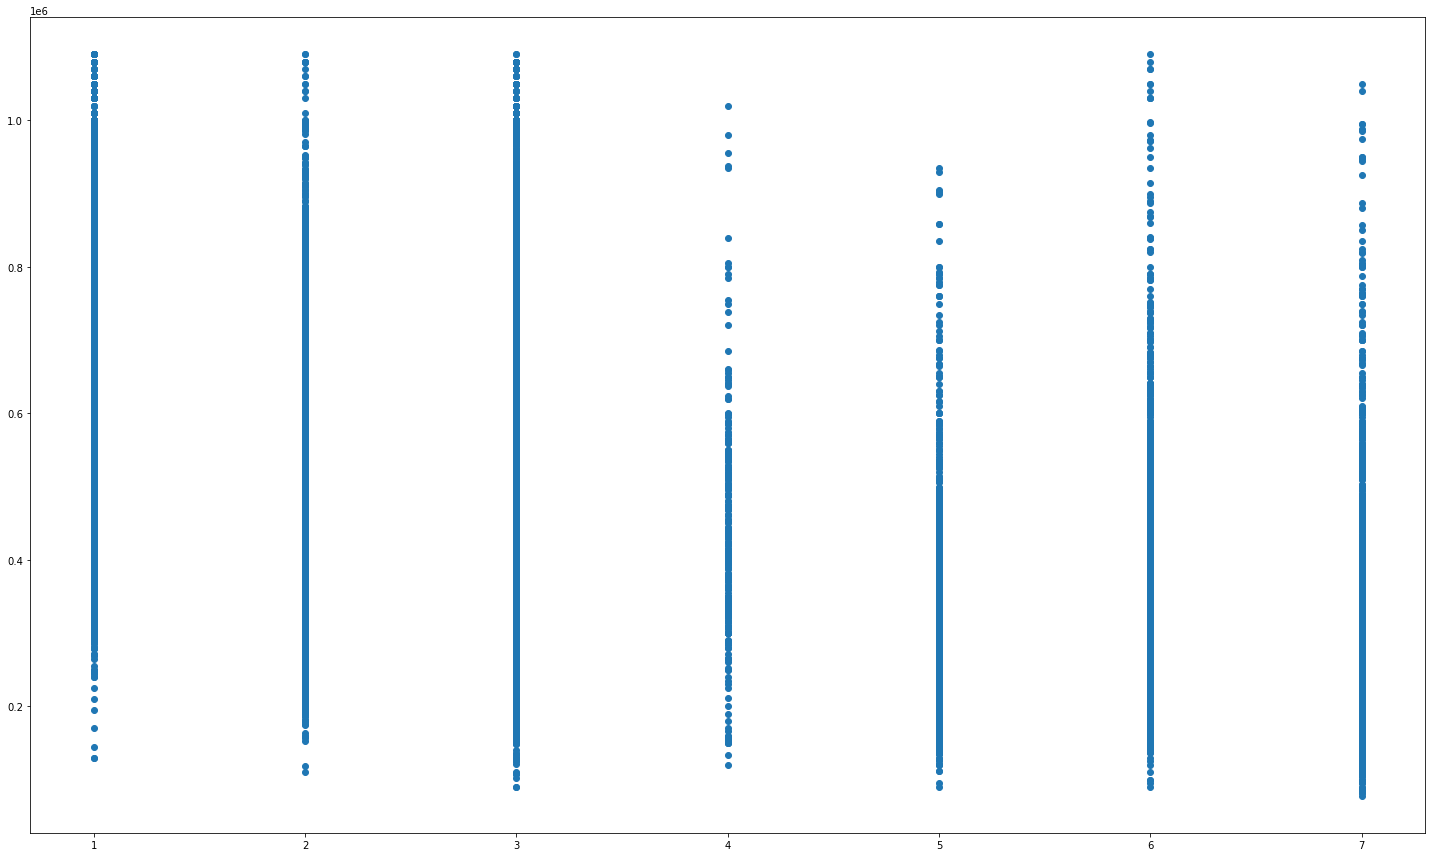

In [206]:
plt.figure(figsize=(25,15))
plt.scatter(x=data_pred2['grade_rank'], y=data_pred2['price'])

In [207]:
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
sns.boxplot(x="grade_rank", y="price", data=data_pred2)

When we look at the grade rank feature, there is a linear trend as you go down the grade ranks.From this you can see that the categorical values from 1-3, which represent grade letters from A+ to A-, influnce the price of a home substantially. The more expensive a house is the more taxes is paid into education. This can be confirmed if we evaluate home price based on districts. Districts with high letter grades should also have higher prices as well.

In [340]:
district_order = ['tukwila','federal way','auburn','kent',
                  'highline', 'tahoma', 'renton', 'shoreline', 'riverview',
                  'vashon island', 'snoqualmie valley', 'seattle', 'northshore','lake washington',
                  'issaquah', 'bellevue', 'mercer island']
plt.figure(figsize=(25,15))
sns.set()
district_plot =sns.boxplot(x='district', y="price",data=data_pred2,order=district_order,hue_order='grade_rank')
district_plot.set_title('District vs. Price', fontsize=30)
district_plot.set_xlabel('District', fontsize=20)
district_plot.set_ylabel('Price', fontsize=20)
district_plot.set_xticklabels(district_order,rotation=30);
district_plot.text(.657,.9, "9 out of 10 districts from the top 10 districts with highest price fall within the an A ranked School district ",
                   color='red', fontsize=20, verticalalignment='top', horizontalalignment='right', transform=district_plot.transAxes)
                   

Text(0.657, 0.9, '9 out of 10 districts from the top 10 districts with highest price fall within the an A ranked School district ')

In [318]:
kc_school_district[0:10]

district grade total_sch total_student  \
0      mercer island    A+         6         4,522   
1           bellevue    A+        31        21,609   
2    lake washington    A+        55        30,675   
3           issaquah    A+        27        20,897   
4      vashon island     A         5         1,585   
5         northshore     A        39         23500   
6             tahoma     A         9         8,906   
7          shoreline     A        19         9,899   
8  snoqualmie valley    A-        13         7,214   
9            seattle    A-       108        55,271   

                                             zipcode  grade_rank  
0                                            [98040]           1  
1  [98004, 98005, 98006, 98007, 98008, 98039, 98121]           1  
2  [98028, 98033, 98034, 98052, 98053, 98074, 98077]           1  
3  [98006, 98008, 98027, 98029, 98059, 98065, 98075]           1  
4                                            [98070]           2  
5                [98011, 98028, 98052, 98072, 98077]           2  
6                              [98038, 98042, 98051]           2  
7                              [98133, 98155, 98177]           2  
8                              [98024, 98045, 98065]           3  
9  [98101, 98102, 98103, 98104, 98105, 98106, 981...           3

From the graph above districts that have a higher average grade letters has a greater average distribution of the home price. 

In [210]:
data_schsite_K_12

long_cen    lat_cen  zipcode         district  \
0   -122.152304  47.608458    98005         bellevue   
1   -122.205416  47.768905    98011       northshore   
2   -122.348456  47.525263    98106          seattle   
3   -122.200171  47.667242    98033  lake washington   
4   -122.294728  47.708040    98125          seattle   
..          ...        ...      ...              ...   
634 -122.300337  47.682235    98115          seattle   
636 -122.228328  47.537685    98040    mercer island   
637 -122.218848  47.759858    98011       northshore   
638 -122.318018  47.694271    98115          seattle   
640 -122.138098  47.264255    98092           auburn   

                    featuredes                             name  \
0                  School-High            Sammamish High School   
1            School-Elementary    Saint Brendan Catholic School   
2            School-Elementary  Highland Park Elementary School   
3            School-Elementary       Lakeview Elementary School   
4                  School-High          Nathan Hale High School   
..                         ...                              ...   
634          School-Elementary  Northwest Montessori - Wedgwood   
636  School-Junior High/Middle           Islander Middle School   
637                School-High              Bothell High School   
638          School-Elementary               The Perkins School   
640                School-K-12        Muckleshoot Tribal School   

                                          coor  
0                  (47.60845843, -122.1523045)  
1           (47.76890453, -122.20541570000002)  
2                   (47.5252633, -122.3484565)  
3                  (47.66724247, -122.2001713)  
4                   (47.70804026, -122.294728)  
..                                         ...  
634                (47.68223475, -122.3003366)  
636                (47.53768453, -122.2283277)  
637         (47.75985845, -122.21884779999999)  
638  (47.694270700000004, -122.31801829999999)  
640          (47.2642549, -122.13809750000001)  

[515 rows x 7 columns]

In [92]:
list_school

['School-High',
 'School-Elementary',
 'School-Junior High/Middle',
 'School-K-12']

In [93]:
list_district

['bellevue',
 'northshore',
 'seattle',
 'lake washington',
 'highline',
 'renton',
 'snoqualmie valley',
 'kent',
 'federal way',
 'auburn',
 'issaquah',
 'shoreline',
 'tahoma',
 'enumclaw',
 'riverview',
 'mercer island',
 'tukwila',
 'vashon island',
 'skykomish']

In [211]:
data_schsite_K_12['coor'] = list(zip(data_schsite_K_12.lat_cen, data_schsite_K_12.long_cen))
data_pred2['coor'] = list(zip(data_pred2.lat, data_pred2.long))

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
def distance_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [102]:
def dist_school(district, feature, df, i):
    df_dist = data_schsite_K_12.loc[data_schsite_K_12.district == district].loc[data_schsite_K_12.featuredes == feature]
    df_dist.reset_index(inplace=True, drop=True)
# You want to find the shortest of all transportation
    y = []
    
    for key in range(len(df_dist['coor'])):
        x = hs.haversine(df_dist['coor'][key],df.iloc[i].coor)
        y.append(x)
        short_dist = min(y)
    
    return short_dist

In [212]:
dist_school(data_pred2['district'][0], 'School-K-12', data_pred2, 0)

11.140996441958603

In [213]:
dist_School_K_12 = []
for key in range(len(data_pred2)):
    try:
        dist_School_K_12.append(dist_school(data_pred2['district'][key], 'School-K-12' , data_pred2, key))
    except UnboundLocalError:
        x = 0
        dist_School_K_12.append(x)

In [214]:
dist_School_Junior_High_Middle = []
for key in range(len(data_pred2)):
    try:
        dist_School_Junior_High_Middle.append(dist_school(data_pred2['district'][key], 'School-Junior High/Middle' , data_pred2, key))
    except UnboundLocalError:
        x = 0
        dist_School_Junior_High_Middle.append(x)

In [215]:
dist_School_Elementary = []
for key in range(len(data_pred2)):
    try:
        dist_School_Elementary.append(dist_school(data_pred2['district'][key], 'School-Elementary' , data_pred2, key))
    except UnboundLocalError:
        x = 0
        dist_School_Elementary.append(x)

In [216]:
dist_School_High = []
for key in range(len(data_pred2)):
    try:
        dist_School_High.append(dist_school(data_pred2['district'][key], 'School-High' , data_pred2, key))
    except UnboundLocalError:
        x = 0
        dist_School_High.append(x)

In [217]:
len(dist_School_Elementary)

18109

In [218]:
x = {'School_K_12': dist_School_K_12, 
     'School_Junior_High_Middle': dist_School_Junior_High_Middle,
     'School_Elementary': dist_School_Elementary,
     'dist_School_High': dist_School_High}

df_school_distance = pd.DataFrame(x, columns = ['School_K_12','School_Junior_High_Middle','School_Elementary','dist_School_High'])
df_school_distance

School_K_12  School_Junior_High_Middle  School_Elementary  \
0        11.140996                   1.012163           0.395590   
1         3.402627                   4.019878           0.179572   
2        13.790617                   2.338692           1.692124   
3         7.330850                   2.089249           1.149859   
4         1.830627                   2.351809           1.111754   
...            ...                        ...                ...   
18104    10.350240                   1.483939           0.089681   
18105     9.517683                   0.623003           1.353518   
18106    10.420255                   0.616743           0.988853   
18107     3.263548                   0.552658           0.388024   
18108     3.295963                   0.576987           0.355159   

       dist_School_High  
0              1.424494  
1              0.822000  
2              2.204664  
3              1.129238  
4              2.267955  
...                 ...  
18104          1.780232  
18105          1.325666  
18106          2.213985  
18107          1.211531  
18108          1.244388  

[18109 rows x 4 columns]

In [219]:
data_pred3 = pd.concat([data_pred2, df_school_distance], axis=1)
data_pred3

level_0  index     price  bedrooms  bathrooms  sqft_lot  sqft_living  \
0            0      1  538000.0         3       2.25      7242         2570   
1            1      2  180000.0         2       1.00     10000          770   
2            2      3  604000.0         4       3.00      5000         1960   
3            3      4  510000.0         3       2.00      8080         1680   
4            5      6  257500.0         3       2.25      6819         1715   
...        ...    ...       ...       ...        ...       ...          ...   
18104    19216  21591  475000.0         3       2.50      1294         1310   
18105    19217  21592  360000.0         3       2.50      1131         1530   
18106    19218  21593  400000.0         4       2.50      5813         2310   
18107    19219  21594  402101.0         2       0.75      1350         1020   
18108    19220  21596  325000.0         2       0.75      1076         1020   

       floors  waterfront  condition  ...         district  grades  \
0         2.0         0.0          3  ...          seattle      A-   
1         1.0         0.0          3  ...       northshore       A   
2         1.0         0.0          5  ...          seattle      A-   
3         1.0         0.0          3  ...  lake washington      A+   
4         2.0         0.0          3  ...      federal way      C+   
...       ...         ...        ...  ...              ...     ...   
18104     2.0         0.0          3  ...          seattle      A-   
18105     3.0         0.0          3  ...          seattle      A-   
18106     2.0         0.0          3  ...         highline      C+   
18107     2.0         0.0          3  ...          seattle      A-   
18108     2.0         0.0          3  ...          seattle      A-   

       grade_rank  total_sch  total_student                            coor  \
0               3        108         55,271  (47.721000000000004, -122.319)   
1               2         39          23500  (47.7379, -122.23299999999999)   
2               3        108         55,271  (47.5208, -122.39299999999999)   
3               1         55         30,675             (47.6168, -122.045)   
4               7         46         23,489  (47.3097, -122.32700000000001)   
...           ...        ...            ...                             ...   
18104           3        108         55,271  (47.5773, -122.40899999999999)   
18105           3        108         55,271             (47.6993, -122.346)   
18106           7         40         19,213  (47.5107, -122.36200000000001)   
18107           3        108         55,271  (47.5944, -122.29899999999999)   
18108           3        108         55,271  (47.5941, -122.29899999999999)   

      School_K_12 School_Junior_High_Middle  School_Elementary  \
0       11.140996                  1.012163           0.395590   
1        3.402627                  4.019878           0.179572   
2       13.790617                  2.338692           1.692124   
3        7.330850                  2.089249           1.149859   
4        1.830627                  2.351809           1.111754   
...           ...                       ...                ...   
18104   10.350240                  1.483939           0.089681   
18105    9.517683                  0.623003           1.353518   
18106   10.420255                  0.616743           0.988853   
18107    3.263548                  0.552658           0.388024   
18108    3.295963                  0.576987           0.355159   

      dist_School_High  
0             1.424494  
1             0.822000  
2             2.204664  
3             1.129238  
4             2.267955  
...                ...  
18104         1.780232  
18105         1.325666  
18106         2.213985  
18107         1.211531  
18108         1.244388  

[18109 rows x 26 columns]

In [220]:
data_pred3.describe()

level_0         index         price      bedrooms     bathrooms  \
count  18109.000000  18109.000000  1.810900e+04  18109.000000  18109.000000   
mean    9587.323927  10784.896074  4.743376e+05      3.328897      2.049340   
std     5539.855083   6212.447143  2.044013e+05      0.909753      0.708352   
min        0.000000      1.000000  7.800000e+04      1.000000      0.500000   
25%     4791.000000   5406.000000  3.150000e+05      3.000000      1.500000   
50%     9568.000000  10789.000000  4.370000e+05      3.000000      2.000000   
75%    14381.000000  16152.000000  6.000000e+05      4.000000      2.500000   
max    19220.000000  21596.000000  1.090000e+06     33.000000      7.500000   

           sqft_lot   sqft_living        floors    waterfront     condition  \
count  1.810900e+04  18109.000000  18109.000000  18109.000000  18109.000000   
mean   1.461000e+04   1970.408802      1.475289      0.002761      3.404937   
std    3.990716e+04    769.358532      0.536918      0.052475      0.645181   
min    5.200000e+02    370.000000      1.000000      0.000000      1.000000   
25%    5.000000e+03   1400.000000      1.000000      0.000000      3.000000   
50%    7.500000e+03   1850.000000      1.000000      0.000000      3.000000   
75%    1.030000e+04   2430.000000      2.000000      0.000000      4.000000   
max    1.651359e+06   7480.000000      3.500000      1.000000      5.000000   

       ...    sqft_above  sqft_basement       zipcode           lat  \
count  ...  18109.000000   18109.000000  18109.000000  18109.000000   
mean   ...   1706.190734     258.461594  98078.327241     47.556415   
std    ...    725.973188     402.785570     53.235008      0.141373   
min    ...    370.000000       0.000000  98001.000000     47.155900   
25%    ...   1170.000000       0.000000  98033.000000     47.459400   
50%    ...   1510.000000       0.000000  98065.000000     47.566600   
75%    ...   2100.000000     500.000000  98118.000000     47.679800   
max    ...   5710.000000    2720.000000  98199.000000     47.777600   

               long    grade_rank   School_K_12  School_Junior_High_Middle  \
count  18109.000000  18109.000000  18109.000000               18109.000000   
mean    -122.213208      3.452758      5.726461                   2.536364   
std        0.142433      1.975368      4.600735                   2.418406   
min     -122.519000      1.000000      0.000000                   0.077673   
25%     -122.330000      2.000000      1.302811                   1.139994   
50%     -122.232000      3.000000      5.701303                   1.859189   
75%     -122.122000      5.000000      9.056221                   3.121994   
max     -121.315000      7.000000     31.787080                  45.551259   

       School_Elementary  dist_School_High  
count       18109.000000      18109.000000  
mean            1.343814          2.857131  
std             1.848450          2.669809  
min             0.014196          0.057563  
25%             0.515283          1.241244  
50%             0.828429          2.080772  
75%             1.405841          3.490561  
max            44.514339         47.762001  

[8 rows x 21 columns]

## Creating engineered:

I will be multiplying the distance to a school with the grade rank. This will help seperate similar distance to a school but in a location that has a more favorable grade rank. 

In [229]:
data_pred3['ef_School_Junior_High_Middle'] = data_pred3['grade_rank']*data_pred3['School_Junior_High_Middle']
data_pred3['ef_dist_School_High'] = data_pred3['grade_rank']*data_pred3['dist_School_High']
data_pred3['ef_School_Elementary'] = data_pred3['grade_rank']*data_pred3['School_Elementary']
data_pred3['ef_School_K_12'] = data_pred3['grade_rank']*data_pred3['School_K_12']

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x1080 with 0 Axes>

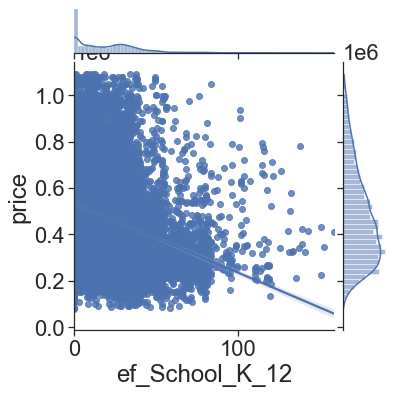

In [296]:
plt.figure(figsize=(25,15))
sns.jointplot('ef_School_K_12','price', data=data_pred3, kind='reg')

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x1080 with 0 Axes>

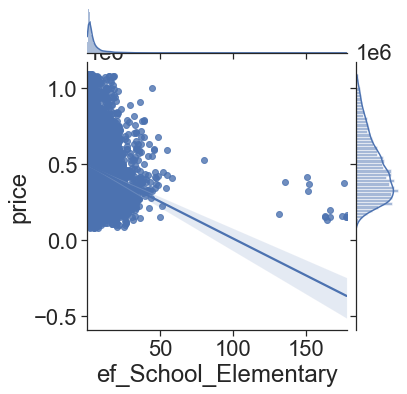

In [297]:
plt.figure(figsize=(25,15))
sns.jointplot('ef_School_Elementary','price', data=data_pred3, kind='reg')

In [298]:
plt.figure(figsize=(25,15))
sns.jointplot('ef_dist_School_High','price', data=data_pred3, kind='reg')

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x1080 with 0 Axes>

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x1080 with 0 Axes>

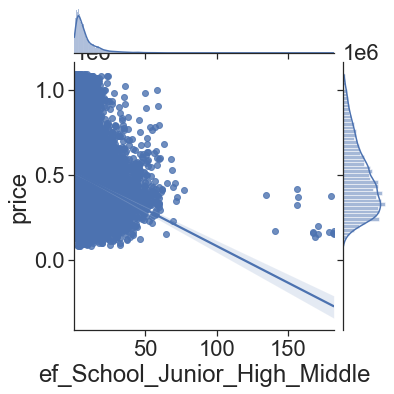

In [299]:
plt.figure(figsize=(25,15))
sns.jointplot('ef_School_Junior_High_Middle','price', data=data_pred3, kind='reg')

In [289]:
data_pred3.corr()

level_0     index     price  bedrooms  \
level_0                       1.000000  0.999995  0.030325  0.004720   
index                         0.999995  1.000000  0.030285  0.004674   
price                         0.030325  0.030285  1.000000  0.291749   
bedrooms                      0.004720  0.004674  0.291749  1.000000   
bathrooms                     0.110708  0.110627  0.451298  0.490724   
sqft_lot                     -0.029134 -0.029115  0.098219  0.022518   
sqft_living                   0.045643  0.045579  0.618268  0.585578   
floors                        0.184814  0.184706  0.277194  0.159375   
waterfront                    0.002833  0.002781  0.050799 -0.028278   
condition                    -0.095115 -0.095073  0.030604  0.021564   
grade                         0.088086  0.088015  0.630287  0.320571   
sqft_above                    0.075626  0.075559  0.531661  0.464683   
sqft_basement                -0.048554 -0.048556  0.218195  0.272775   
zipcode                      -0.001686 -0.001661 -0.016858 -0.147346   
lat                          -0.002203 -0.002159  0.436243 -0.032550   
long                          0.011296  0.011277  0.079304  0.141348   
grade_rank                   -0.008209 -0.008231 -0.515102 -0.038370   
School_K_12                  -0.000770 -0.000736 -0.097382 -0.084293   
School_Junior_High_Middle     0.000646  0.000656  0.038278  0.046622   
School_Elementary            -0.013269 -0.013266  0.023155  0.034161   
dist_School_High             -0.014557 -0.014545  0.156900  0.061035   
ef_School_Junior_High_Middle -0.001372 -0.001382 -0.209262  0.011537   
ef_dist_School_High          -0.010104 -0.010123 -0.180831  0.004442   
ef_School_Elementary         -0.009185 -0.009203 -0.168740 -0.001387   
ef_School_K_12                0.000457  0.000461 -0.286731 -0.054970   

                              bathrooms  sqft_lot  sqft_living    floors  \
level_0                        0.110708 -0.029134     0.045643  0.184814   
index                          0.110627 -0.029115     0.045579  0.184706   
price                          0.451298  0.098219     0.618268  0.277194   
bedrooms                       0.490724  0.022518     0.585578  0.159375   
bathrooms                      1.000000  0.063628     0.716474  0.507293   
sqft_lot                       0.063628  1.000000     0.161761 -0.016418   
sqft_living                    0.716474  0.161761     1.000000  0.345047   
floors                         0.507293 -0.016418     0.345047  1.000000   
waterfront                    -0.007379  0.027041    -0.000437 -0.007379   
condition                     -0.141145 -0.009367    -0.076553 -0.279269   
grade                          0.613128  0.096691     0.704343  0.457377   
sqft_above                     0.638928  0.165516     0.854416  0.530842   
sqft_basement                  0.211415  0.010298     0.361709 -0.291324   
zipcode                       -0.206091 -0.129870    -0.204411 -0.065866   
lat                           -0.009616 -0.093721     0.009934  0.037741   
long                           0.250763  0.222079     0.289784  0.139293   
grade_rank                    -0.144243 -0.002186    -0.146732 -0.126052   
School_K_12                   -0.126573 -0.095003    -0.153244 -0.068590   
School_Junior_High_Middle      0.092725  0.167442     0.129055  0.009800   
School_Elementary              0.042883  0.179277     0.088578 -0.025387   
dist_School_High               0.116599  0.205613     0.185103  0.008876   
ef_School_Junior_High_Middle   0.002210  0.157090     0.031443 -0.030192   
ef_dist_School_High           -0.010730  0.197999     0.039376 -0.055880   
ef_School_Elementary          -0.022837  0.170226     0.016662 -0.048220   
ef_School_K_12                -0.122628 -0.054467    -0.140568 -0.083430   

                              waterfront  condition  ...      long  \
level_0                         0.002833  -0.095115  ...  0.011296   
index                           0.002781 

In [358]:
sns.set_style('ticks')
sns.lmplot(x='ef_School_K_12', y='price', data=data_pred3, aspect=2, line_kws={'color': 'crimson'}, x_bins=150)
plt.title('Relationship Between House Price and ef_School_K_12', fontsize=20)
plt.xlabel('District*Distance', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
#plt.ylim(100000,750000)
plt.xlim(0, 100);
plt.tight_layout()

In [363]:
sns.set_style('ticks')
sns.lmplot(x='ef_School_Junior_High_Middle', y='price', data=data_pred3, aspect=2, line_kws={'color': 'crimson'}, x_bins=150)
plt.title('Relationship Between House Price and ef_School_K_12', fontsize=20)
plt.xlabel('District*Distance', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
#plt.ylim(100000,750000)
plt.xlim(0, 70);
plt.tight_layout()

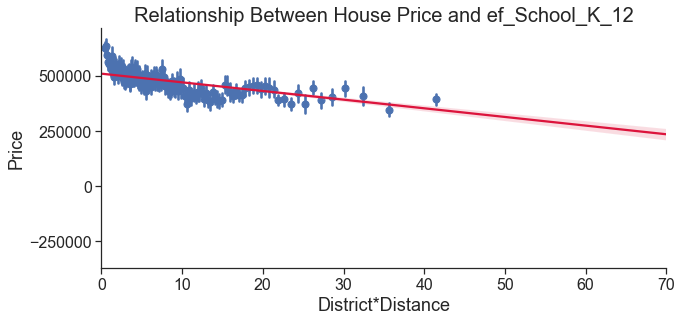

In [364]:
sns.set_style('ticks')
sns.lmplot(x='ef_dist_School_High', y='price', data=data_pred3, aspect=2, line_kws={'color': 'crimson'}, x_bins=150)
plt.title('Relationship Between House Price and ef_School_K_12', fontsize=20)
plt.xlabel('District*Distance', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
#plt.ylim(100000,750000)
plt.xlim(0, 70);
plt.tight_layout()

In [362]:
sns.set_style('ticks')
sns.lmplot(x='ef_School_Elementary', y='price', data=data_pred3, aspect=2, line_kws={'color': 'crimson'}, x_bins=150)
plt.title('Relationship Between House Price and ef_School_K_12', fontsize=20)
plt.xlabel('District*Distance', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
#plt.ylim(100000,750000)
plt.xlim(0, 50);
plt.tight_layout()

## Point of interest Binned 


In [139]:
data_kc_poi= pd.read_csv('Common_Points_of_Interest_for_King_County____common_interest_point.csv')
data_kc_poi.head()

X          Y  OBJECTID  FEATURE_ID     ESITE  CODE  \
0 -122.286944  47.499985         1     6002948       0.0   600   
1 -122.305465  47.635532         2         828       0.0   600   
2 -122.211064  47.405961         3         374       0.0   600   
3 -121.912156  47.650466         4        1891  124849.0   390   
4 -122.295038  47.441348         5        1817  401027.0    60   

                               NAME                          ABB_NAME  \
0  Green River Trail Site - Tukwila  Green River Trail Site - Tukwila   
1                   Interlaken Park                   Interlaken Park   
2               Garrison Creek Park               Garrison Creek Park   
3                 Carnation Library                     Carnation Lib   
4             Sea-Tac Office Center             Sea-Tac Office Center   

                                             ADDRESS  ZIPCODE  
0  27th Ave S and S 112th St to 69th Ave S and S ...    98188  
1                        Interlaken Pl & Delmar Dr E    98102  
2                            S 218th St & 98th Ave S    98031  
3                                     4804 Tolt  Ave    98014  
4                                18000 Pacific Hwy S    98188

In [140]:
district_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    district_KC.append(selected_columns(zipcode, 'district'))

In [141]:
x = {'district': district_KC}
df_poi_dist = pd.DataFrame(x, columns = ['district'])
df_poi_dist

district
0           tukwila
1           seattle
2              kent
3         riverview
4           tukwila
...             ...
6486     northshore
6487        seattle
6488        seattle
6489  vashon island
6490         auburn

[6491 rows x 1 columns]

In [142]:
data_kc_poi = pd.concat([data_kc_poi, df_poi_dist], axis=1)
data_kc_poi.head()

X          Y  OBJECTID  FEATURE_ID     ESITE  CODE  \
0 -122.286944  47.499985         1     6002948       0.0   600   
1 -122.305465  47.635532         2         828       0.0   600   
2 -122.211064  47.405961         3         374       0.0   600   
3 -121.912156  47.650466         4        1891  124849.0   390   
4 -122.295038  47.441348         5        1817  401027.0    60   

                               NAME                          ABB_NAME  \
0  Green River Trail Site - Tukwila  Green River Trail Site - Tukwila   
1                   Interlaken Park                   Interlaken Park   
2               Garrison Creek Park               Garrison Creek Park   
3                 Carnation Library                     Carnation Lib   
4             Sea-Tac Office Center             Sea-Tac Office Center   

                                             ADDRESS  ZIPCODE   district  
0  27th Ave S and S 112th St to 69th Ave S and S ...    98188    tukwila  
1                        Interlaken Pl & Delmar Dr E    98102    seattle  
2                            S 218th St & 98th Ave S    98031       kent  
3                                     4804 Tolt  Ave    98014  riverview  
4                                18000 Pacific Hwy S    98188    tukwila

In [366]:
data_kc_poi.loc[data_kc_poi.district == 'shoreline'].loc[data_kc_poi.CODE == 330]

Empty DataFrame
Columns: [X, Y, OBJECTID, FEATURE_ID, ESITE, CODE, NAME, ABB_NAME, ADDRESS, ZIPCODE, district, coor]
Index: []

In [149]:
data_kc_poi['coor'] = list(zip(data_kc_poi.Y, data_kc_poi.X))

In [ ]:
entertainment = {600:'Parks and Recreation', 690: 'Shopping Center', 240: 'Entertainment and Sports',
 350: 'Food Facility'}
transportation = {510: 'Other Transportation',500: 'Transit Center', 30: 'Airport',  570: 'Park and Ride'}
Medical_emergency = {330: 'Hostpital or Medical Center', 67: 'Medic Unit' }
police_station = {65: 'Police Station'}
fire_station = {66: 'Fire Station'}
employment_center = {420: 'Major Employment Center or Laber'}


In [143]:
def dist_poi(district, code, df, i):
    df_dist = data_kc_poi.loc[data_kc_poi.district == district].loc[data_kc_poi.CODE == code]
    df_dist.reset_index(inplace=True, drop=True)
# You want to find the shortest of all transportation
    y = []
    
    for key in range(len(df_dist['coor'])):
        x = hs.haversine(df_dist['coor'][key],df.iloc[i].coor)
        y.append(x)
        short_dist = min(y)
    
    return short_dist
        

In [232]:
police_station = []
for key in range(len(data_pred3)):
    try:
        police_station.append(dist_poi(data_pred3['district'][key], 65 , data_pred3, key))
    except UnboundLocalError:
        x = 0
        police_station.append(x)

In [233]:
transit_center = []
for key in range(len(data_pred3)):
    try:
        transit_center.append(dist_poi(data_pred3['district'][key], 500 , data_pred3, key))
    except UnboundLocalError:
        x = 0
        transit_center.append(x)

In [234]:
medical_center = []
for key in range(len(data_pred3)):
    try:
        medical_center.append(dist_poi(data_pred3['district'][key], 330 , data_pred3, key))
    except UnboundLocalError:
        x = 0
        medical_center.append(x)

In [235]:
x = {'transport_dist': transit_center, 
     'medical_dist': medical_center,
     'police_station_dist': police_station} 

In [236]:
df_dist_poi = pd.DataFrame(x, columns = ['transport_dist','medical_dist','police_station_dist'])
df_dist_poi.head()

transport_dist  medical_dist  police_station_dist
0        2.200032      1.520117             2.329885
1       10.578848      3.526628             2.797147
2        9.593575      2.501342             2.876385
3       13.590865     14.881427            14.495456
4        1.894400      0.607868             0.638233

In [237]:
data_pred4 = pd.concat([data_pred3, df_dist_poi], axis=1)
data_pred4.head()

level_0  index     price  bedrooms  bathrooms  sqft_lot  sqft_living  \
0        0      1  538000.0         3       2.25      7242         2570   
1        1      2  180000.0         2       1.00     10000          770   
2        2      3  604000.0         4       3.00      5000         1960   
3        3      4  510000.0         3       2.00      8080         1680   
4        5      6  257500.0         3       2.25      6819         1715   

   floors  waterfront  condition  ...  School_Junior_High_Middle  \
0     2.0         0.0          3  ...                   1.012163   
1     1.0         0.0          3  ...                   4.019878   
2     1.0         0.0          5  ...                   2.338692   
3     1.0         0.0          3  ...                   2.089249   
4     2.0         0.0          3  ...                   2.351809   

   School_Elementary  dist_School_High  ef_School_Junior_High_Middle  \
0           0.395590          1.424494                      3.036488   
1           0.179572          0.822000                      8.039757   
2           1.692124          2.204664                      7.016075   
3           1.149859          1.129238                      2.089249   
4           1.111754          2.267955                     16.462666   

   ef_dist_School_High  ef_School_Elementary ef_School_K_12 transport_dist  \
0             4.273482              1.186770      33.422989       2.200032   
1             1.644000              0.359145       6.805255      10.578848   
2             6.613991              5.076371      41.371852       9.593575   
3             1.129238              1.149859       7.330850      13.590865   
4            15.875688              7.782280      12.814386       1.894400   

   medical_dist police_station_dist  
0      1.520117            2.329885  
1      3.526628            2.797147  
2      2.501342            2.876385  
3     14.881427           14.495456  
4      0.607868            0.638233  

[5 rows x 33 columns]

In [245]:
data_pred4.district.unique()

array(['seattle', 'northshore', 'lake washington', 'federal way',
       'highline', 'tahoma', 'riverview', 'auburn', 'kent', 'issaquah',
       'renton', 'bellevue', 'mercer island', 'snoqualmie valley',
       'enumclaw', 'shoreline', 'tukwila', 'vashon island'], dtype=object)

In [238]:
data_pred4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 33 columns):
level_0                         18109 non-null int64
index                           18109 non-null int64
price                           18109 non-null float64
bedrooms                        18109 non-null int64
bathrooms                       18109 non-null float64
sqft_lot                        18109 non-null int64
sqft_living                     18109 non-null int64
floors                          18109 non-null float64
waterfront                      18109 non-null float64
condition                       18109 non-null int64
grade                           18109 non-null int64
sqft_above                      18109 non-null int64
sqft_basement                   18109 non-null float64
zipcode                         18109 non-null int64
lat                             18109 non-null float64
long                            18109 non-null float64
district                     

In [367]:
data_pred4.describe()

level_0         index         price      bedrooms     bathrooms  \
count  18109.000000  18109.000000  1.810900e+04  18109.000000  18109.000000   
mean    9587.323927  10784.896074  4.743376e+05      3.328897      2.049340   
std     5539.855083   6212.447143  2.044013e+05      0.909753      0.708352   
min        0.000000      1.000000  7.800000e+04      1.000000      0.500000   
25%     4791.000000   5406.000000  3.150000e+05      3.000000      1.500000   
50%     9568.000000  10789.000000  4.370000e+05      3.000000      2.000000   
75%    14381.000000  16152.000000  6.000000e+05      4.000000      2.500000   
max    19220.000000  21596.000000  1.090000e+06     33.000000      7.500000   

           sqft_lot   sqft_living        floors    waterfront     condition  \
count  1.810900e+04  18109.000000  18109.000000  18109.000000  18109.000000   
mean   1.461000e+04   1970.408802      1.475289      0.002761      3.404937   
std    3.990716e+04    769.358532      0.536918      0.052475      0.645181   
min    5.200000e+02    370.000000      1.000000      0.000000      1.000000   
25%    5.000000e+03   1400.000000      1.000000      0.000000      3.000000   
50%    7.500000e+03   1850.000000      1.000000      0.000000      3.000000   
75%    1.030000e+04   2430.000000      2.000000      0.000000      4.000000   
max    1.651359e+06   7480.000000      3.500000      1.000000      5.000000   

       ...  School_Junior_High_Middle  School_Elementary  dist_School_High  \
count  ...               18109.000000       18109.000000      18109.000000   
mean   ...                   2.536364           1.343814          2.857131   
std    ...                   2.418406           1.848450          2.669809   
min    ...                   0.077673           0.014196          0.057563   
25%    ...                   1.139994           0.515283          1.241244   
50%    ...                   1.859189           0.828429          2.080772   
75%    ...                   3.121994           1.405841          3.490561   
max    ...                  45.551259          44.514339         47.762001   

       ef_School_Junior_High_Middle  ef_dist_School_High  \
count                  18109.000000         18109.000000   
mean                       8.484770             8.976668   
std                        9.928823             9.425142   
min                        0.091129             0.146685   
25%                        2.779258             3.138459   
50%                        5.462905             6.052526   
75%                       10.502977            12.208873   
max                      182.205035           191.048003   

       ef_School_Elementary  ef_School_K_12  transport_dist  medical_dist  \
count          18109.000000    18109.000000    18109.000000  18109.000000   
mean               4.457507       20.627730        4.177963      2.758561   
std                7.121269       19.495862        3.564767      2.937865   
min                0.042588        0.000000        0.000000      0.000000   
25%                1.262248        2.947731        1.335455      1.094960   
50%                2.362213       18.302700        3.655503      1.970243   
75%                4.991935       31.760428        6.253969      3.220308   
max              178.057358      158.935398       20.022081     36.246340   

       police_station_dist  
count         18109.000000  
mean              3.326691  
std               3.029628  
min               0.047024  
25%               1.642788  
50%               2.598552  
75%               3.910492  
max              50.328019  

[8 rows x 28 columns]

In [262]:
data_pred4.district.unique()

array(['seattle', 'northshore', 'lake washington', 'federal way',
       'highline', 'tahoma', 'riverview', 'auburn', 'kent', 'issaquah',
       'renton', 'bellevue', 'mercer island', 'snoqualmie valley',
       'enumclaw', 'shoreline', 'tukwila', 'vashon island'], dtype=object)

In [269]:
def district_subplot(i):
    
    fig, axes = plt.subplots(6,3, figsize= (40,40))
    axes[0,0].scatter(x=data_pred4.loc[data_pred4.district == 'seattle'][i], y=data_pred4.loc[data_pred4.district == 'seattle'].price)
    axes[0,0].set_title('seattle')

    axes[0,1].scatter(x=data_pred4.loc[data_pred4.district == 'northshore'][i], y=data_pred4.loc[data_pred4.district == 'northshore'].price)
    axes[0,1].set_title('northshore')

    axes[0,2].scatter(x=data_pred4.loc[data_pred4.district == 'lake washington'][i], y=data_pred4.loc[data_pred4.district == 'lake washington'].price)
    axes[0,2].set_title('lake washington')

    axes[1,0].scatter(x=data_pred4.loc[data_pred4.district == 'federal way'][i], y=data_pred4.loc[data_pred4.district == 'federal way'].price)
    axes[1,0].set_title('federal way')

    axes[1,1].scatter(x=data_pred4.loc[data_pred4.district == 'highline'][i], y=data_pred4.loc[data_pred4.district == 'highline'].price)
    axes[1,1].set_title('highline')

    axes[1,2].scatter(x=data_pred4.loc[data_pred4.district == 'tahoma'][i], y=data_pred4.loc[data_pred4.district == 'tahoma'].price)
    axes[1,2].set_title('tahoma')

    axes[2,0].scatter(x=data_pred4.loc[data_pred4.district == 'riverview'][i], y=data_pred4.loc[data_pred4.district == 'riverview'].price)
    axes[2,0].set_title('riverview')

    axes[2,1].scatter(x=data_pred4.loc[data_pred4.district == 'auburn'][i], y=data_pred4.loc[data_pred4.district == 'auburn'].price)
    axes[2,1].set_title('auburn')

    axes[2,2].scatter(x=data_pred4.loc[data_pred4.district == 'kent'][i], y=data_pred4.loc[data_pred4.district == 'kent'].price)
    axes[2,2].set_title('kent')

    axes[3,0].scatter(x=data_pred4.loc[data_pred4.district == 'issaquah'][i], y=data_pred4.loc[data_pred4.district == 'issaquah'].price)
    axes[3,0].set_title('issaquah')

    axes[3,1].scatter(x=data_pred4.loc[data_pred4.district == 'renton'][i], y=data_pred4.loc[data_pred4.district == 'renton'].price)
    axes[3,1].set_title('renton')

    axes[3,2].scatter(x=data_pred4.loc[data_pred4.district == 'bellevue'][i], y=data_pred4.loc[data_pred4.district == 'bellevue'].price)
    axes[3,2].set_title('bellevue')

    axes[4,0].scatter(x=data_pred4.loc[data_pred4.district == 'mercer island'][i], y=data_pred4.loc[data_pred4.district == 'mercer island'].price)
    axes[4,0].set_title('mercer island')

    axes[4,1].scatter(x=data_pred4.loc[data_pred4.district == 'snoqualmie valley'][i], y=data_pred4.loc[data_pred4.district == 'snoqualmie valley'].price)
    axes[4,1].set_title('snoqualmine valley')

    axes[4,2].scatter(x=data_pred4.loc[data_pred4.district == 'enumclaw'][i], y=data_pred4.loc[data_pred4.district == 'enumclaw'].price)
    axes[4,2].set_title('enumclaw')

    axes[5,0].scatter(x=data_pred4.loc[data_pred4.district == 'shoreline'][i], y=data_pred4.loc[data_pred4.district == 'shoreline'].price)
    axes[5,0].set_title('shoreline')

    axes[5,1].scatter(x=data_pred4.loc[data_pred4.district == 'tukwila'][i], y=data_pred4.loc[data_pred4.district == 'tukwila'].price)
    axes[5,1].set_title('tukwila')

    axes[5,2].scatter(x=data_pred4.loc[data_pred4.district == 'vashon island'][i], y=data_pred4.loc[data_pred4.district == 'vashon island'].price)
    axes[5,2].set_title('vashon island')

In [353]:
kc_school_district[0:10]

district grade total_sch total_student  \
0      mercer island    A+         6         4,522   
1           bellevue    A+        31        21,609   
2    lake washington    A+        55        30,675   
3           issaquah    A+        27        20,897   
4      vashon island     A         5         1,585   
5         northshore     A        39         23500   
6             tahoma     A         9         8,906   
7          shoreline     A        19         9,899   
8  snoqualmie valley    A-        13         7,214   
9            seattle    A-       108        55,271   

                                             zipcode  grade_rank  
0                                            [98040]           1  
1  [98004, 98005, 98006, 98007, 98008, 98039, 98121]           1  
2  [98028, 98033, 98034, 98052, 98053, 98074, 98077]           1  
3  [98006, 98008, 98027, 98029, 98059, 98065, 98075]           1  
4                                            [98070]           2  
5                [98011, 98028, 98052, 98072, 98077]           2  
6                              [98038, 98042, 98051]           2  
7                              [98133, 98155, 98177]           2  
8                              [98024, 98045, 98065]           3  
9  [98101, 98102, 98103, 98104, 98105, 98106, 981...           3

In [275]:
district_subplot('police_station_dist')

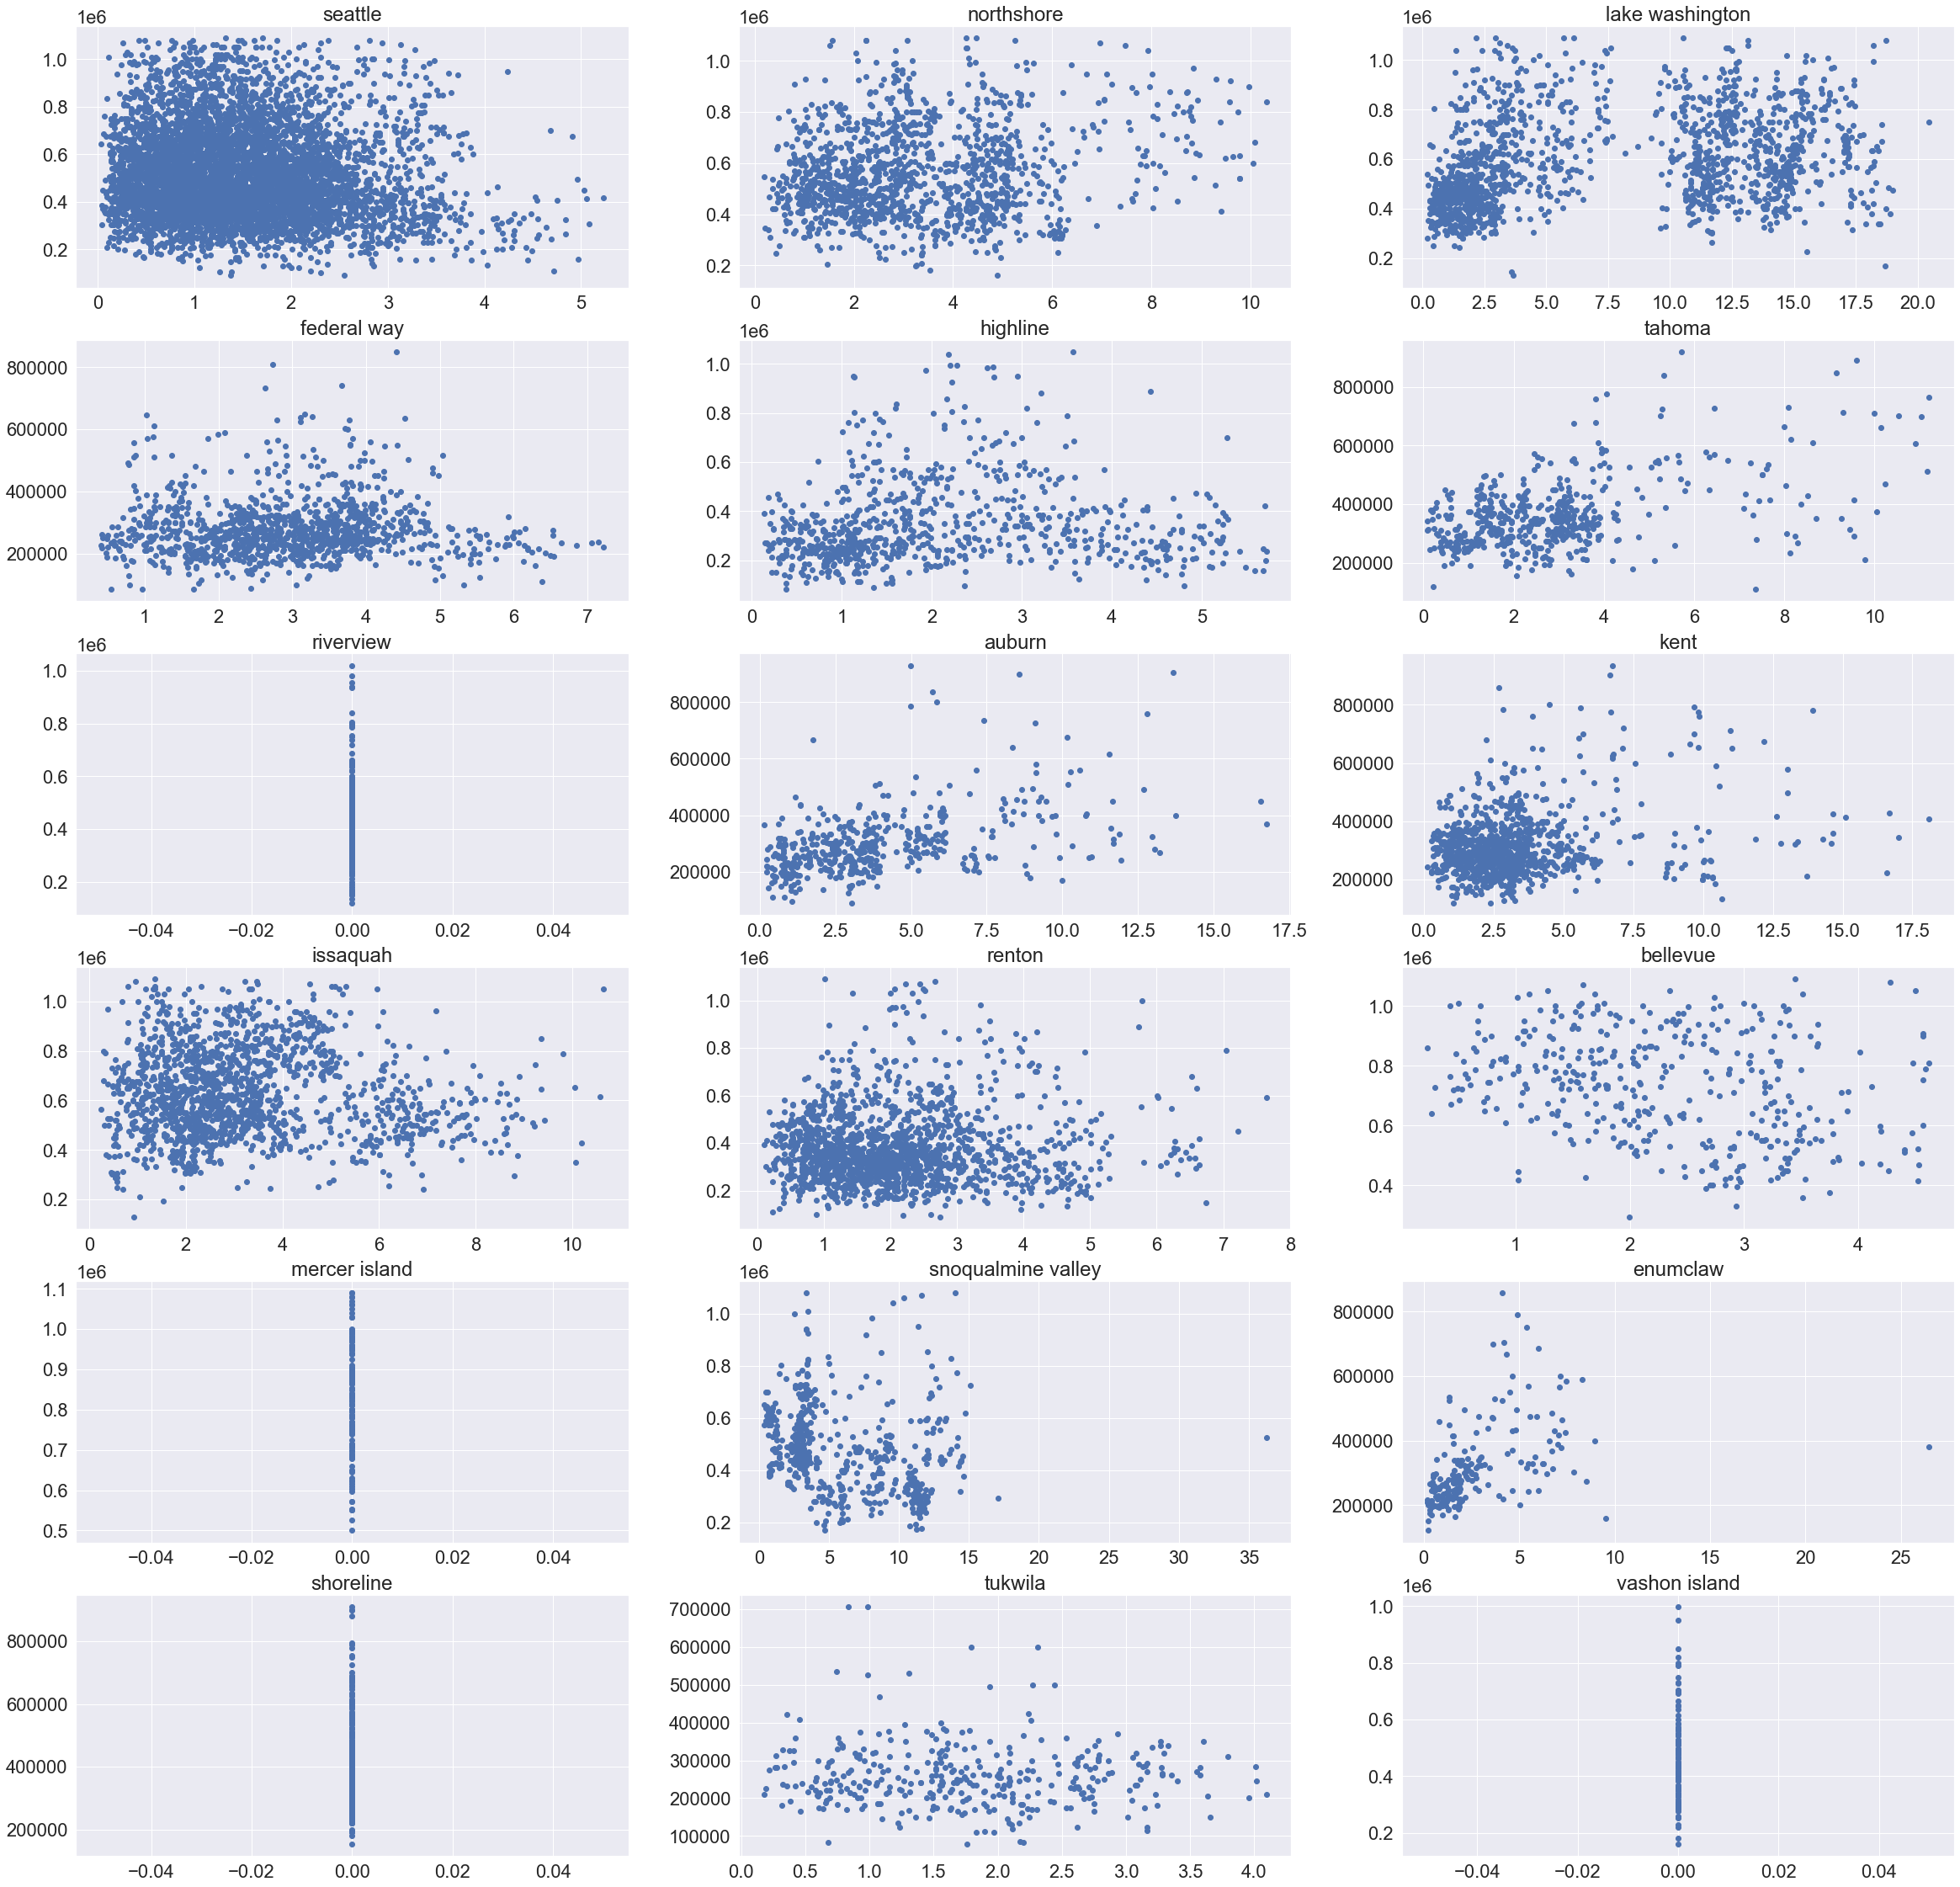

In [276]:
district_subplot('medical_dist')

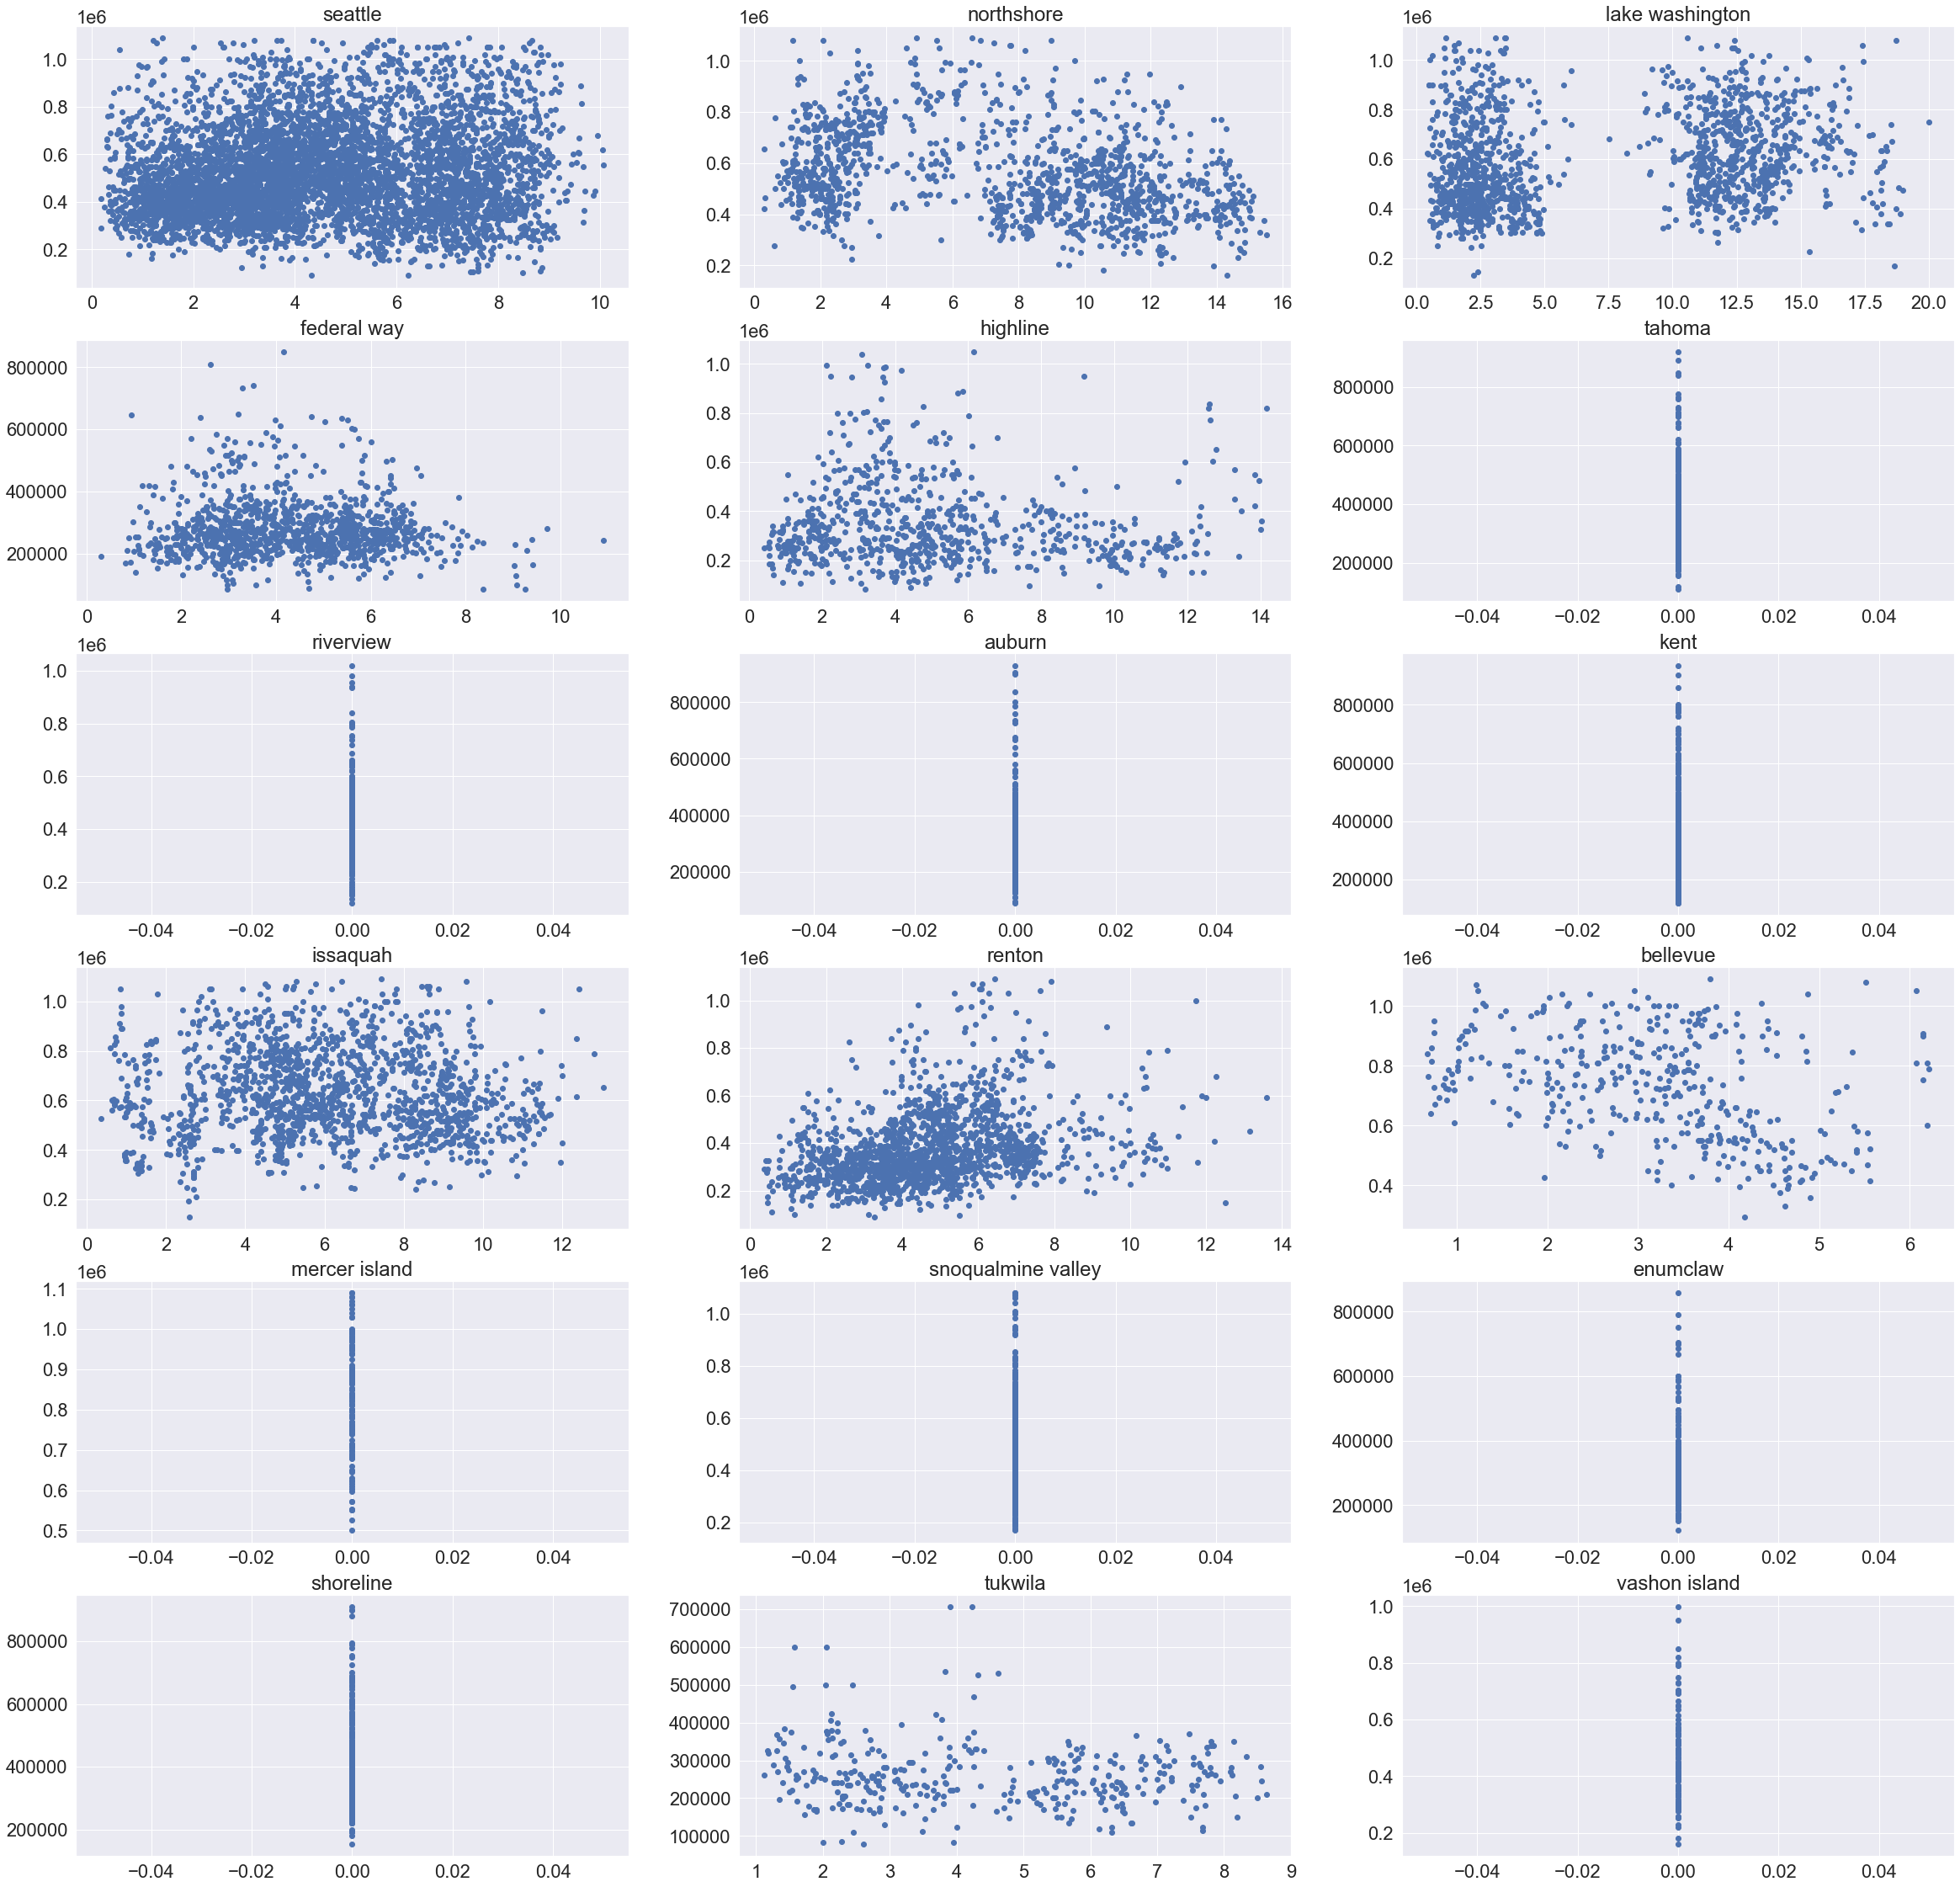

In [278]:
district_subplot('transport_dist')

In [280]:
data_pred4.corr()

level_0     index     price  bedrooms  \
level_0                       1.000000  0.999995  0.030325  0.004720   
index                         0.999995  1.000000  0.030285  0.004674   
price                         0.030325  0.030285  1.000000  0.291749   
bedrooms                      0.004720  0.004674  0.291749  1.000000   
bathrooms                     0.110708  0.110627  0.451298  0.490724   
sqft_lot                     -0.029134 -0.029115  0.098219  0.022518   
sqft_living                   0.045643  0.045579  0.618268  0.585578   
floors                        0.184814  0.184706  0.277194  0.159375   
waterfront                    0.002833  0.002781  0.050799 -0.028278   
condition                    -0.095115 -0.095073  0.030604  0.021564   
grade                         0.088086  0.088015  0.630287  0.320571   
sqft_above                    0.075626  0.075559  0.531661  0.464683   
sqft_basement                -0.048554 -0.048556  0.218195  0.272775   
zipcode                      -0.001686 -0.001661 -0.016858 -0.147346   
lat                          -0.002203 -0.002159  0.436243 -0.032550   
long                          0.011296  0.011277  0.079304  0.141348   
grade_rank                   -0.008209 -0.008231 -0.515102 -0.038370   
School_K_12                  -0.000770 -0.000736 -0.097382 -0.084293   
School_Junior_High_Middle     0.000646  0.000656  0.038278  0.046622   
School_Elementary            -0.013269 -0.013266  0.023155  0.034161   
dist_School_High             -0.014557 -0.014545  0.156900  0.061035   
ef_School_Junior_High_Middle -0.001372 -0.001382 -0.209262  0.011537   
ef_dist_School_High          -0.010104 -0.010123 -0.180831  0.004442   
ef_School_Elementary         -0.009185 -0.009203 -0.168740 -0.001387   
ef_School_K_12                0.000457  0.000461 -0.286731 -0.054970   
transport_dist               -0.005662 -0.005655  0.221639  0.008920   
medical_dist                 -0.016178 -0.016178  0.118318  0.064448   
police_station_dist          -0.004539 -0.004540  0.174476  0.023148   

                              bathrooms  sqft_lot  sqft_living    floors  \
level_0                        0.110708 -0.029134     0.045643  0.184814   
index                          0.110627 -0.029115     0.045579  0.184706   
price                          0.451298  0.098219     0.618268  0.277194   
bedrooms                       0.490724  0.022518     0.585578  0.159375   
bathrooms                      1.000000  0.063628     0.716474  0.507293   
sqft_lot                       0.063628  1.000000     0.161761 -0.016418   
sqft_living                    0.716474  0.161761     1.000000  0.345047   
floors                         0.507293 -0.016418     0.345047  1.000000   
waterfront                    -0.007379  0.027041    -0.000437 -0.007379   
condition                     -0.141145 -0.009367    -0.076553 -0.279269   
grade                          0.613128  0.096691     0.704343  0.457377   
sqft_above                     0.638928  0.165516     0.854416  0.530842   
sqft_basement                  0.211415  0.010298     0.361709 -0.291324   
zipcode                       -0.206091 -0.129870    -0.204411 -0.065866   
lat                           -0.009616 -0.093721     0.009934  0.037741   
long                           0.250763  0.222079     0.289784  0.139293   
grade_rank                    -0.144243 -0.002186    -0.146732 -0.126052   
School_K_12                   -0.126573 -0.095003    -0.153244 -0.068590   
School_Junior_High_Middle      0.092725  0.167442     0.129055  0.009800   
School_Elementary              0.042883  0.179277     0.088578 -0.025387   
dist_School_High               0.116599  0.205613     0.185103  0.008876   
ef_School_Junior_High_Middle   0.002210  0.157090     0.031443 -0.030192   
ef_dist_School_High           -0.010730  0.197999     0.039376 -0.055880   
ef_School_Elementary          -0.022837  0.170226     0.016662 -0.048220   
ef_School_K_12                -0.122628 -0

In [281]:
data_pred4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 33 columns):
level_0                         18109 non-null int64
index                           18109 non-null int64
price                           18109 non-null float64
bedrooms                        18109 non-null int64
bathrooms                       18109 non-null float64
sqft_lot                        18109 non-null int64
sqft_living                     18109 non-null int64
floors                          18109 non-null float64
waterfront                      18109 non-null float64
condition                       18109 non-null int64
grade                           18109 non-null int64
sqft_above                      18109 non-null int64
sqft_basement                   18109 non-null float64
zipcode                         18109 non-null int64
lat                             18109 non-null float64
long                            18109 non-null float64
district                     

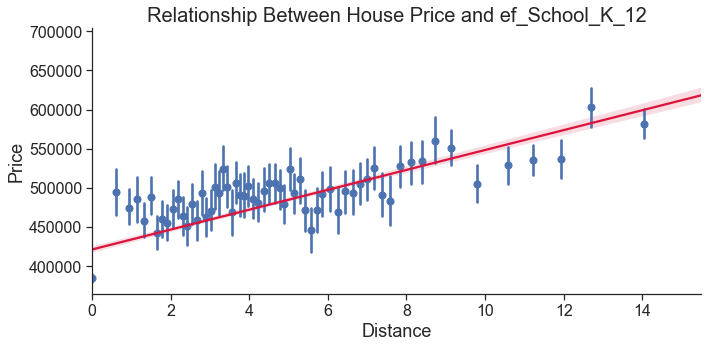

In [327]:
sns.set_style('ticks')
sns.lmplot(x='transport_dist', y='price', data=data_pred4, aspect=2, line_kws={'color': 'crimson'}, x_bins=75)
plt.title('Relationship Between House Price and ef_School_K_12', fontsize=20)
plt.xlabel('Distance', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
#plt.ylim(100000,750000)
plt.xlim(0, 15.5);
plt.tight_layout()

In [369]:
data_pred5= data_pred4.drop(['level_0','index','total_sch','total_student','floors','bedrooms','sqft_above','sqft_basement','condition'], axis=1)

In [371]:
data_pred5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18109 entries, 0 to 18108
Data columns (total 24 columns):
price                           18109 non-null float64
bathrooms                       18109 non-null float64
sqft_lot                        18109 non-null int64
sqft_living                     18109 non-null int64
waterfront                      18109 non-null float64
grade                           18109 non-null int64
zipcode                         18109 non-null int64
lat                             18109 non-null float64
long                            18109 non-null float64
district                        18109 non-null object
grades                          18109 non-null object
grade_rank                      18109 non-null int64
coor                            18109 non-null object
School_K_12                     18109 non-null float64
School_Junior_High_Middle       18109 non-null float64
School_Elementary               18109 non-null float64
dist_School_High        

In [370]:
data_pred5.describe()

price     bathrooms      sqft_lot   sqft_living    waterfront  \
count  1.810900e+04  18109.000000  1.810900e+04  18109.000000  18109.000000   
mean   4.743376e+05      2.049340  1.461000e+04   1970.408802      0.002761   
std    2.044013e+05      0.708352  3.990716e+04    769.358532      0.052475   
min    7.800000e+04      0.500000  5.200000e+02    370.000000      0.000000   
25%    3.150000e+05      1.500000  5.000000e+03   1400.000000      0.000000   
50%    4.370000e+05      2.000000  7.500000e+03   1850.000000      0.000000   
75%    6.000000e+05      2.500000  1.030000e+04   2430.000000      0.000000   
max    1.090000e+06      7.500000  1.651359e+06   7480.000000      1.000000   

              grade       zipcode           lat          long    grade_rank  \
count  18109.000000  18109.000000  18109.000000  18109.000000  18109.000000   
mean       7.526258  98078.327241     47.556415   -122.213208      3.452758   
std        1.032303     53.235008      0.141373      0.142433      1.975368   
min        3.000000  98001.000000     47.155900   -122.519000      1.000000   
25%        7.000000  98033.000000     47.459400   -122.330000      2.000000   
50%        7.000000  98065.000000     47.566600   -122.232000      3.000000   
75%        8.000000  98118.000000     47.679800   -122.122000      5.000000   
max       12.000000  98199.000000     47.777600   -121.315000      7.000000   

       ...  School_Junior_High_Middle  School_Elementary  dist_School_High  \
count  ...               18109.000000       18109.000000      18109.000000   
mean   ...                   2.536364           1.343814          2.857131   
std    ...                   2.418406           1.848450          2.669809   
min    ...                   0.077673           0.014196          0.057563   
25%    ...                   1.139994           0.515283          1.241244   
50%    ...                   1.859189           0.828429          2.080772   
75%    ...                   3.121994           1.405841          3.490561   
max    ...                  45.551259          44.514339         47.762001   

       ef_School_Junior_High_Middle  ef_dist_School_High  \
count                  18109.000000         18109.000000   
mean                       8.484770             8.976668   
std                        9.928823             9.425142   
min                        0.091129             0.146685   
25%                        2.779258             3.138459   
50%                        5.462905             6.052526   
75%                       10.502977            12.208873   
max                      182.205035           191.048003   

       ef_School_Elementary  ef_School_K_12  transport_dist  medical_dist  \
count          18109.000000    18109.000000    18109.000000  18109.000000   
mean               4.457507       20.627730        4.177963      2.758561   
std                7.121269       19.495862        3.564767      2.937865   
min                0.042588        0.000000        0.000000      0.000000   
25%                1.262248        2.947731        1.335455      1.094960   
50%                2.362213       18.302700        3.655503      1.970243   
75%                4.991935       31.760428        6.253969      3.220308   
max              178.057358      158.935398       20.022081     36.246340   

       police_station_dist  
count         18109.000000  
mean              3.326691  
std               3.029628  
min               0.047024  
25%               1.642788  
50%               2.598552  
75%               3.910492  
max              50.328019  

[8 rows x 21 columns]

In [372]:
data_pred5.to_csv('data_pred5', index=False)